In [2]:
from evwTools import *

Welcome to JupyROOT 6.12/06


---

## Lets start with all energies E_{west} > 1700 MeV

---
### delta E/E vs. t_{west}

In [3]:
f = r.TFile("./data/DeltaE_over_energyWest_vs_timeWest_60hUnblinding.root")
f.ls()

TFile**		./data/DeltaE_over_energyWest_vs_timeWest_60hUnblinding.root	
 TFile*		./data/DeltaE_over_energyWest_vs_timeWest_60hUnblinding.root	
  KEY: TCanvas	c1;1	c1


In [4]:
c1 =f.Get("c1")
print([x for x in c1.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffc192b1d0>, <ROOT.TH2D object ("h") at 0x7fffc1930640>, <ROOT.TPaveText object ("title") at 0x7fffc1a508b0>]


In [5]:
h = c1.GetPrimitive("h").Clone()

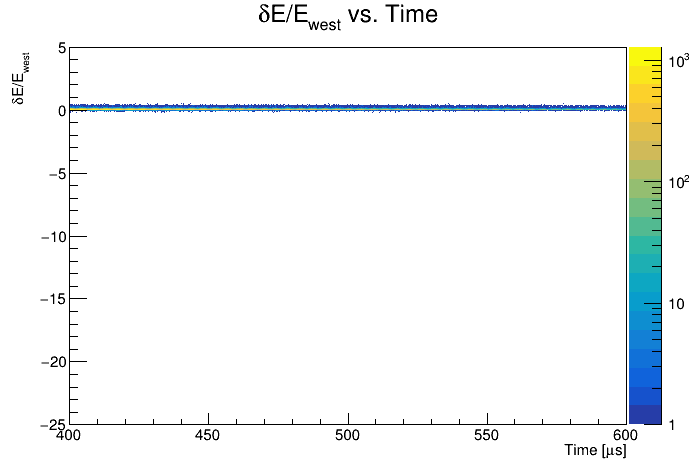

In [6]:
c = r.TCanvas()
h.Draw("colz")
h.GetXaxis().SetRangeUser(400,600)
c.SetLogz()
#c.SetGrid()
c.Draw()

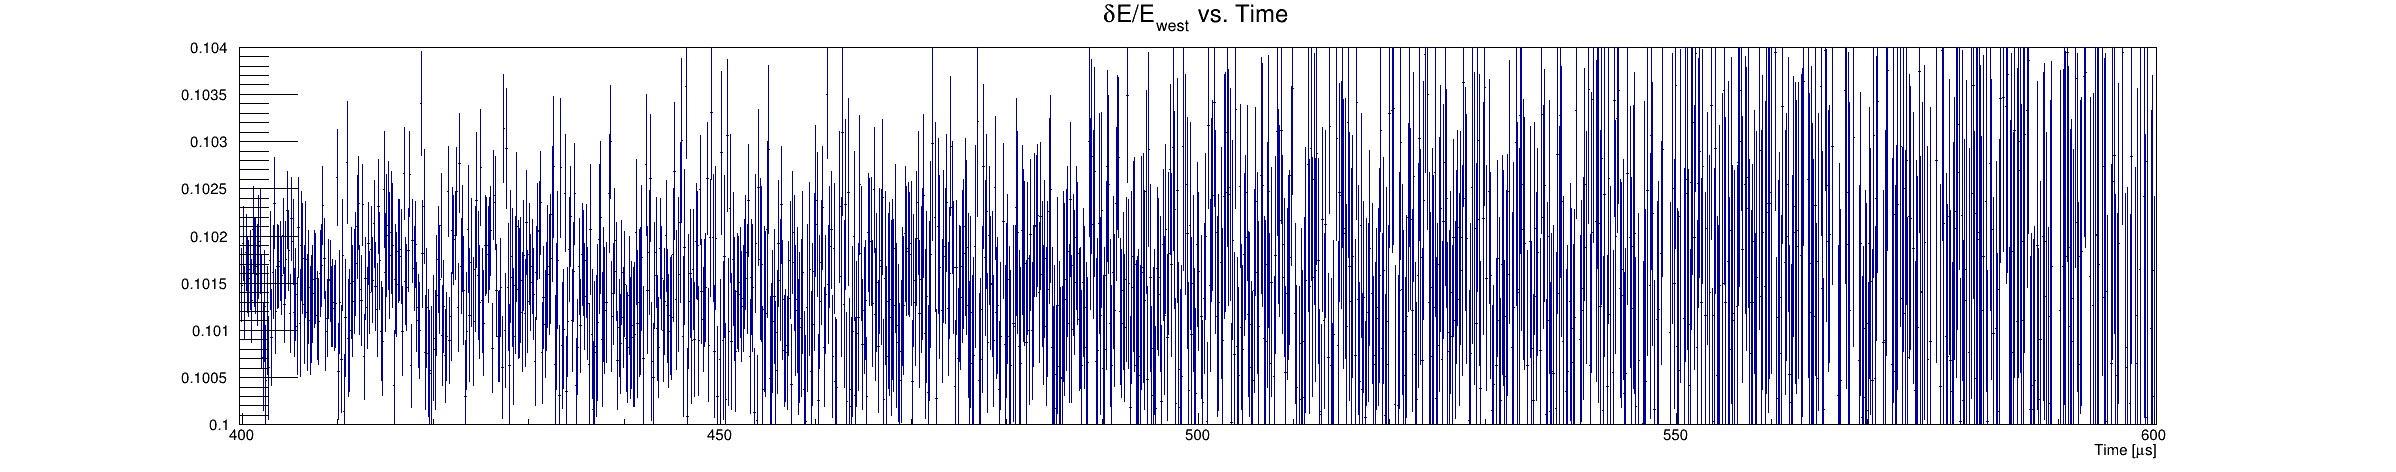

In [7]:
c = r.TCanvas("c","c",2400,500)
h2 = h.ProfileX().Clone("h2")
h2.GetXaxis().SetRangeUser(30,650)
h2.GetYaxis().SetRangeUser(0.1,0.104)
h2.Draw("")
#h2.Fit("pol1")
c.SetLogz()
#c.SetGrid()
c.Draw()

---

### Lets get the FFT of this plot

1344 200.1702127659574 399.81914893617017 599.9893617021276
0.14893617021276592 0.004995748299319729
13.428571428571432 6.714285714285715


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


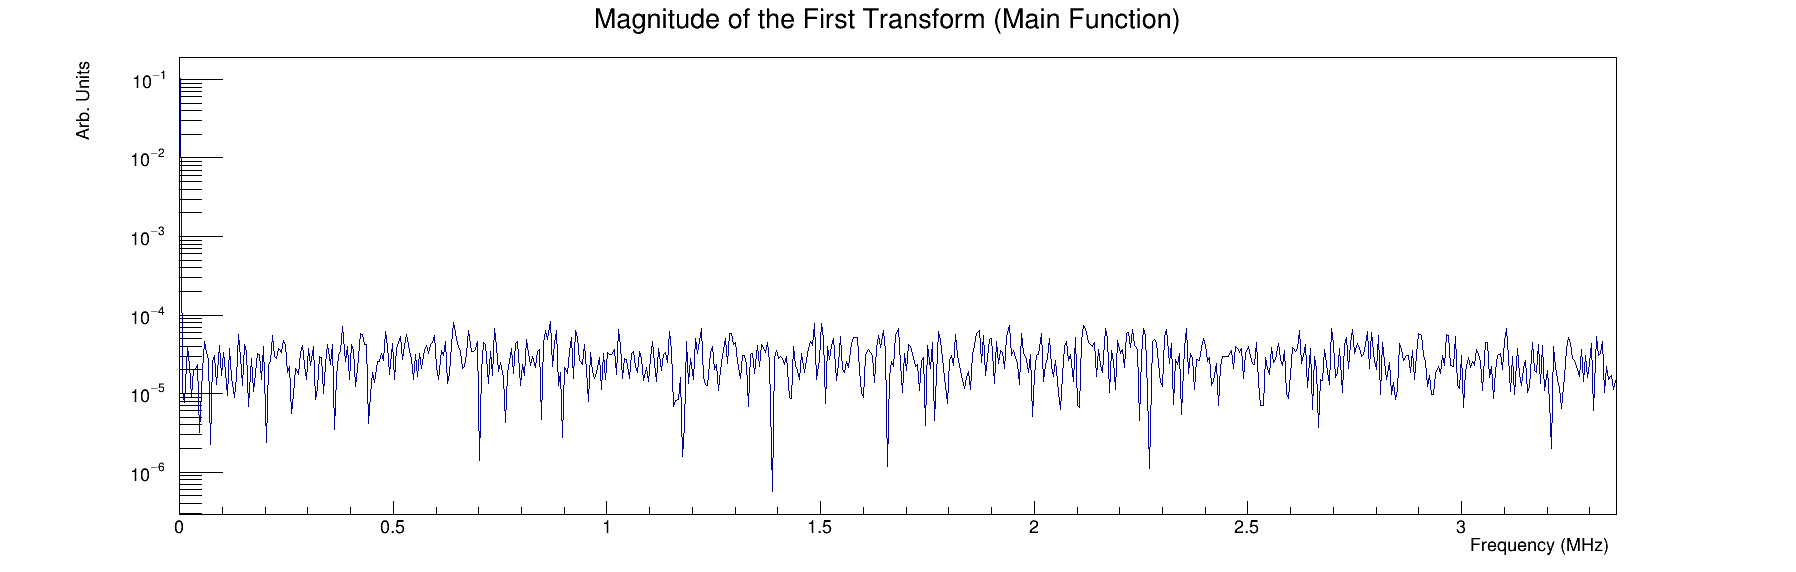

In [167]:
c3 = r.TCanvas("c","c",1800,600)
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = h2.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (Main Function)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas("c","c",1800,600)
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = h2.GetSize() -2
minBinCenter = h2.GetXaxis().GetBinCenter(0)
maxBinCenter = h2.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = h2.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

c2.SetLogy()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


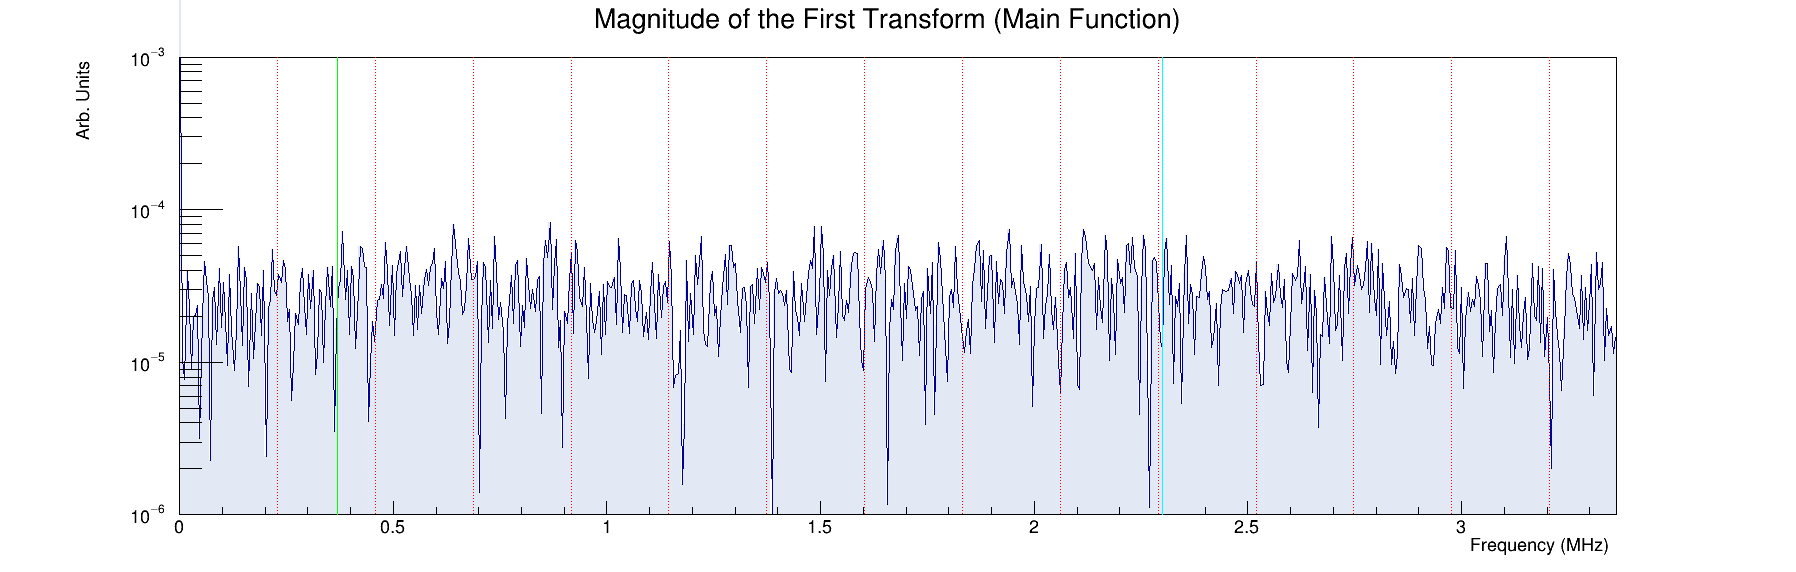

In [168]:
c2 = r.TCanvas("c","c",1800,600)
c2.cd()

ymin = 0.000001
ymax = 0.001
hxform.GetYaxis().SetRangeUser(ymin,ymax)

hxform.SetFillColorAlpha(38,0.2)
hxform.Draw("HIST P0 L")

cboline = r.TLine(0.37,ymin,0.37,ymax)
cboline.SetLineColor(3)
cboline.Draw("SAME")

vwline = r.TLine(2.3,ymin,2.3,ymax)
vwline.SetLineColor(7)
vwline.Draw("SAME")

oalines = []
for i in range(1,15):
    oalinei = r.TLine(0.229*i,ymin,0.229*i,ymax)
    oalinei.SetLineColor(2)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oalines.append(oalinei)
'''
oa_cbo_lines = []
oa_cbo_lines_pos = []
oa_cbo_lines_pos_2 = []
oa_cbo_lines_neg = []
oa_cbo_lines_allCombos = []
ttvec = []
for i in range(1,15):
    oalinei = r.TLine(0.37*i,0.000001,0.37*i,0.001)
    oalinei.SetLineColor(3)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oa_cbo_lines.append(oalinei)
for i in range(1,15):
    oalinei = r.TLine(0.229*i+0.37,0.000001,0.229*i+0.37,0.001)
    oalinei.SetLineColor(6)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oa_cbo_lines_pos.append(oalinei)
for i in range(1,15):
    oalinei = r.TLine(0.229+0.37*i,0.000001,0.229+0.37*i,0.001)
    oalinei.SetLineColor(12)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oa_cbo_lines_pos_2.append(oalinei)
for i in range(2,15):
    oalinei = r.TLine(0.229*i-0.37,0.000001,0.229*i-0.37,0.001)
    oalinei.SetLineColor(6)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oa_cbo_lines_neg.append(oalinei)

for i in range(-10,10):
    for j in range(-10,10):
        for k in range(0,1):
            if(0.229*i+0.37*j+2.3*k < 0):
                continue
            oalinei = r.TLine(0.229*i+0.37*j+2.3*k,0.000001,0.229*i+0.37*j+2.3*k,0.001)
            oalinei.SetLineColor(1)
            oalinei.SetLineStyle(3)
            oalinei.Draw()
            oa_cbo_lines_allCombos.append(oalinei)

            tt = r.TText(.229*i+0.37*j+2.3*k,0.0005,"("+str(i)+","+str(j)+","+str(k)+")")
            ttvec.append(tt)
            tt.Draw()
'''
#hxform.GetYaxis().SetRangeUser(0,1.4)
c2.SetLogy()
#c2.SetGrid()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

In [9]:
mainfuncfft = hxform.Clone("mainfuncfft")

---

### Ok, now lets fit this oscillation

In [10]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def peak_fit_sine(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return ( (p[0]*r.TMath.Sin(omega*x[0] + p[2]))#*r.TMath.Exp(-x[0]/p[9]) 
            #+ p[6]*r.TMath.Sin(2*omega*x[0] + p[7])#*r.TMath.Exp(-x[0]/p[7])  
            #+ p[7]*r.TMath.Sin(p[9]*omega*x[0] + p[8])
            + p[3] #+ p[4]*x[0] + p[5]*(x[0] - p[6])**2
            + p[4]*r.TMath.Exp(-x[0]/p[5])
            + p[6]*r.TMath.Sin(p[8]*x[0] + p[7])*r.TMath.Exp(-x[0]/p[5]) 
            #+ p[9]*x[0]
           )

func1 = r.TF1("simplesine", peak_fit_sine, 30,650,9)
#func1.SetParNames('A','R','#phi_{1}','+ C', 'm', 'a_{quad}', 'c_{quad}' )
func1.SetParNames('A','R','#phi_{1}','+ C', 'A_{log}', '#tau_{log}', 'A_{2}', '#phi_{2}', '#omega_{VW?}', 'm_{linear}')
func1.SetParameters(0.0001,0,0.6,0.1015,-0.001,100)
#func1.SetParLimits(4,-100000000,-0.0000000000000000001) #avoid divide by zero errors
#func1.SetParLimits(7,1,10**15) #avoid divide by zero errors
func1.SetLineColor(2)
func1.SetNpx(5000)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


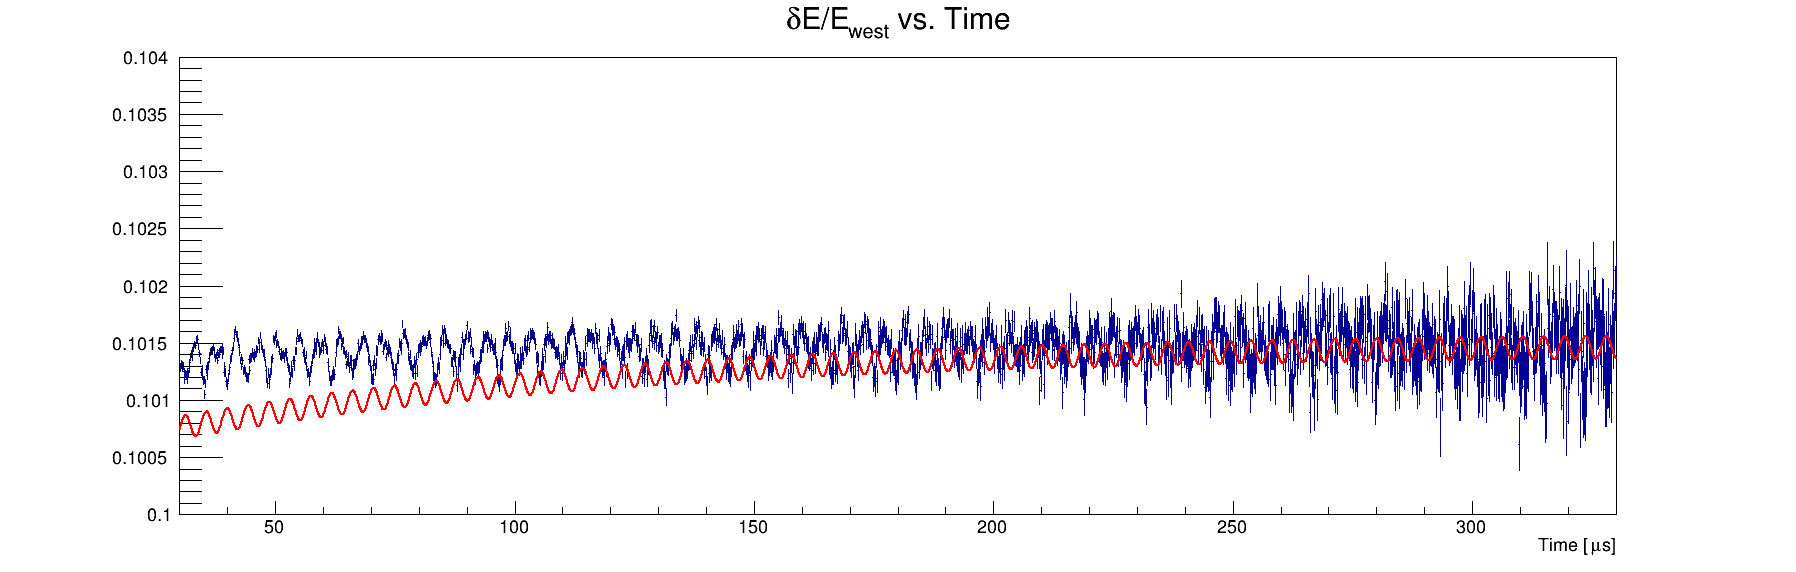

In [11]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(30,330)

func1.SetParameters(0.0001,0,0.6,0.1015,-0.001,100,0.000001,0,2.3,1000,0.000000001)
func1.Draw("SAME")
c.SetLogz()
c.Draw()

Starting Fit 1
Starting Fit 2
 FCN=4564.38 FROM MINOS     STATUS=SUCCESSFUL    154 CALLS        2267 TOTAL
                     EDM=2.5899e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.40586e-04   1.84818e-06  -5.77711e-10   1.17206e+02
   2  R           -3.10592e+02   1.38688e+02  -5.55833e-02   4.87003e-08
   3  #phi_{1}    -2.17131e+00   2.34214e-02   1.23345e-05   8.13059e-03
   4  + C          1.01494e-01   5.01757e-06  -1.41346e-08   5.37821e+02
   5  A_{log}     -2.03629e-04   7.11911e-06  -1.04693e-08   3.05266e+02
   6  #tau_{log}   8.33523e+01   6.54780e+00  -2.35238e-02  -2.09492e-04
   7  A_{2}        1.22192e-04   7.43697e-06   2.27903e-08   1.48245e+02
   8  #phi_{2}    -1.12019e+00   8.18000e-02   1.19568e-03  -1.71881e-02
   9  #omega_{VW?}   2.32604e+00   1.25785e-03   1.25785e-03  -5.60602e-02
 FCN=4564.3

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


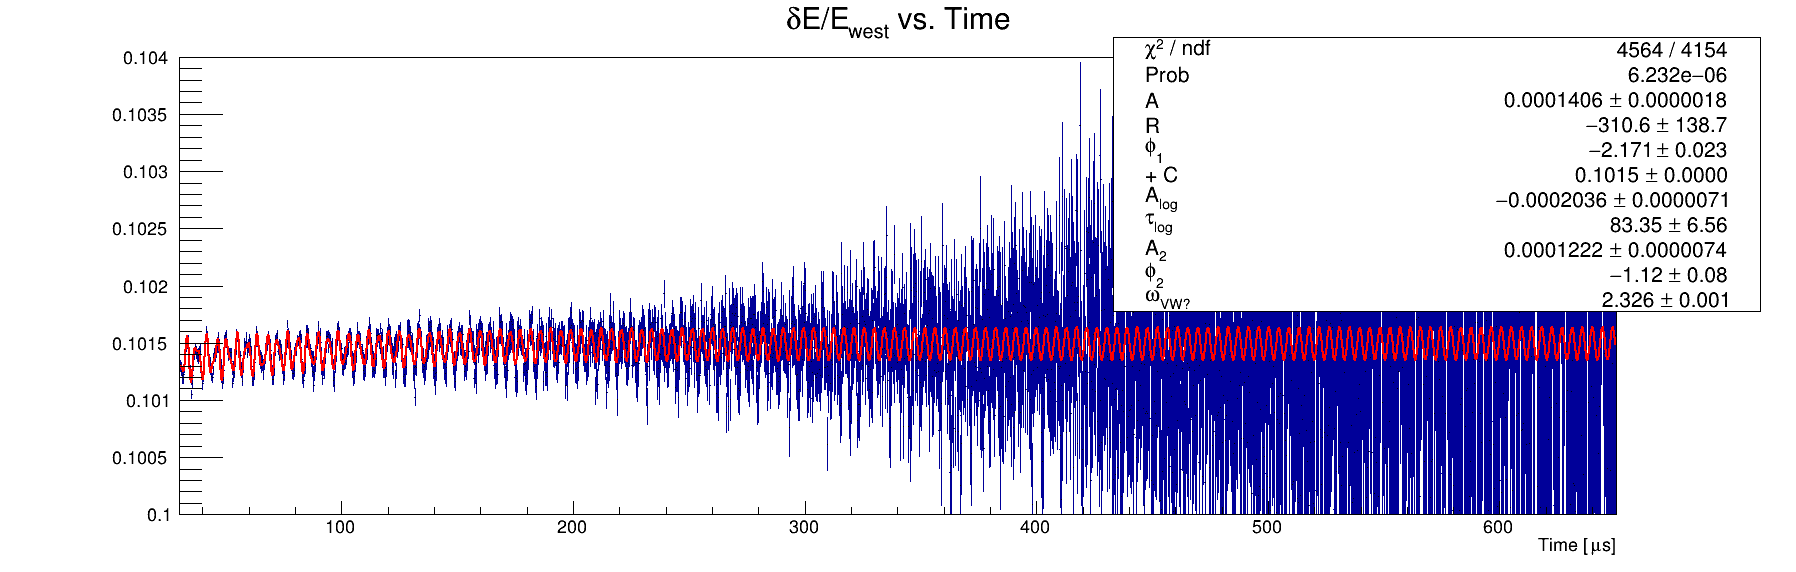

In [12]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(30,700)
for i in range(2):
    print("Starting Fit", i+1)
    h2.Fit("simplesine","REMB")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


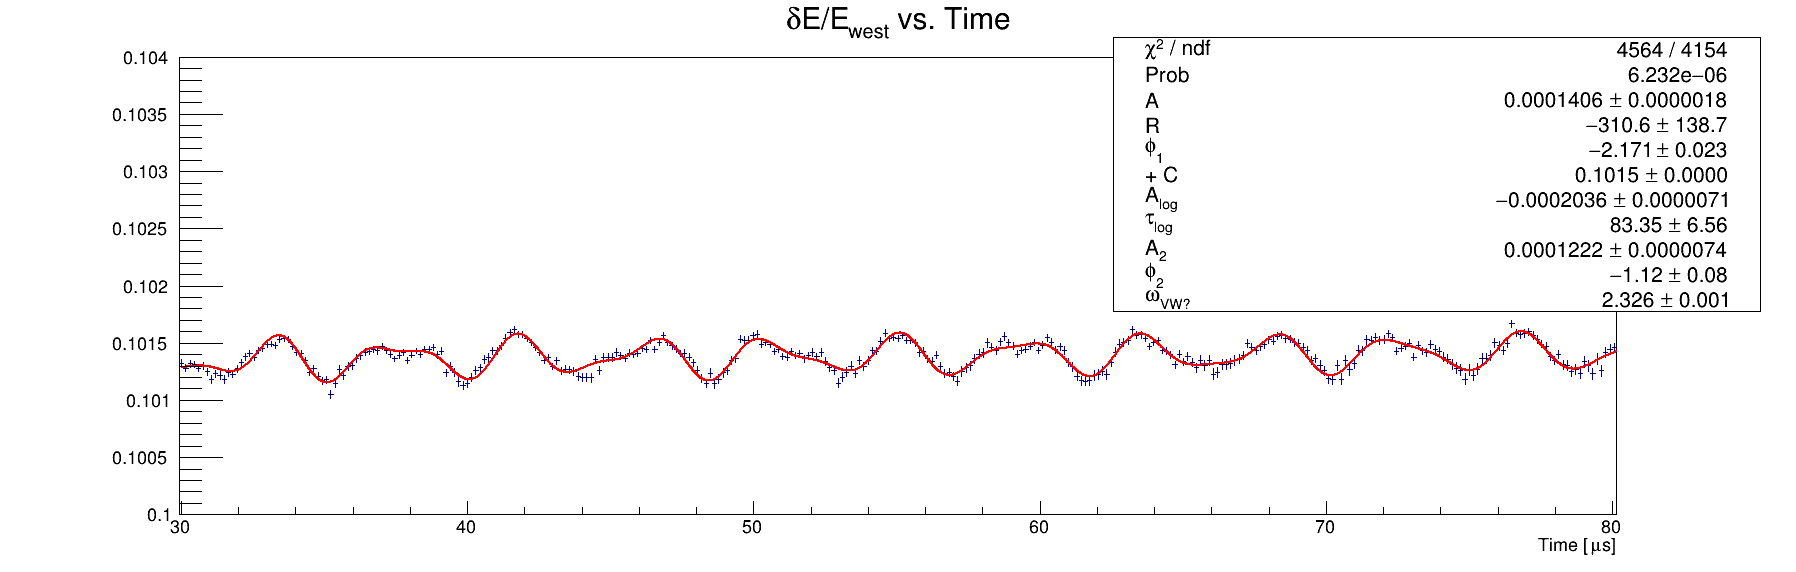

In [13]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(30,80)
#func1.Draw("same")
c.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


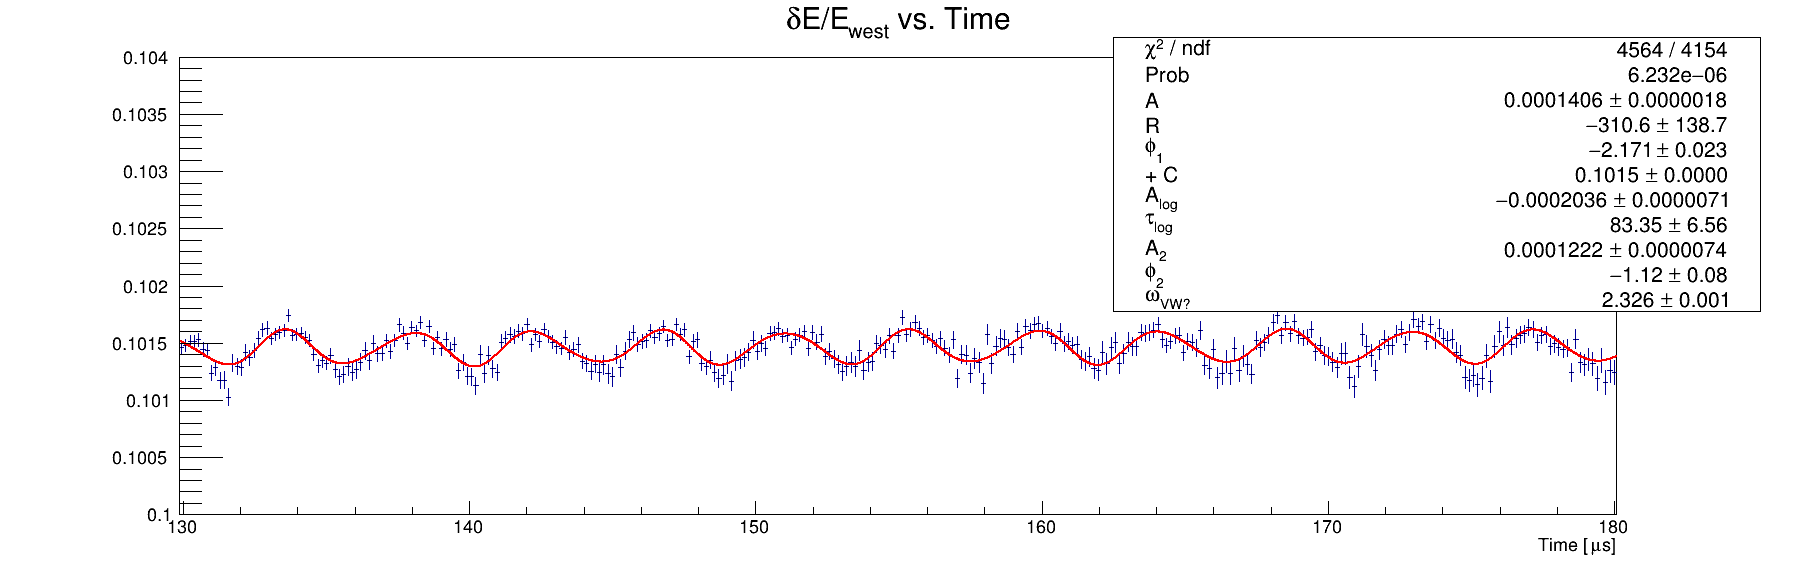

In [14]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(130,180)
#func1.Draw("same")
c.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


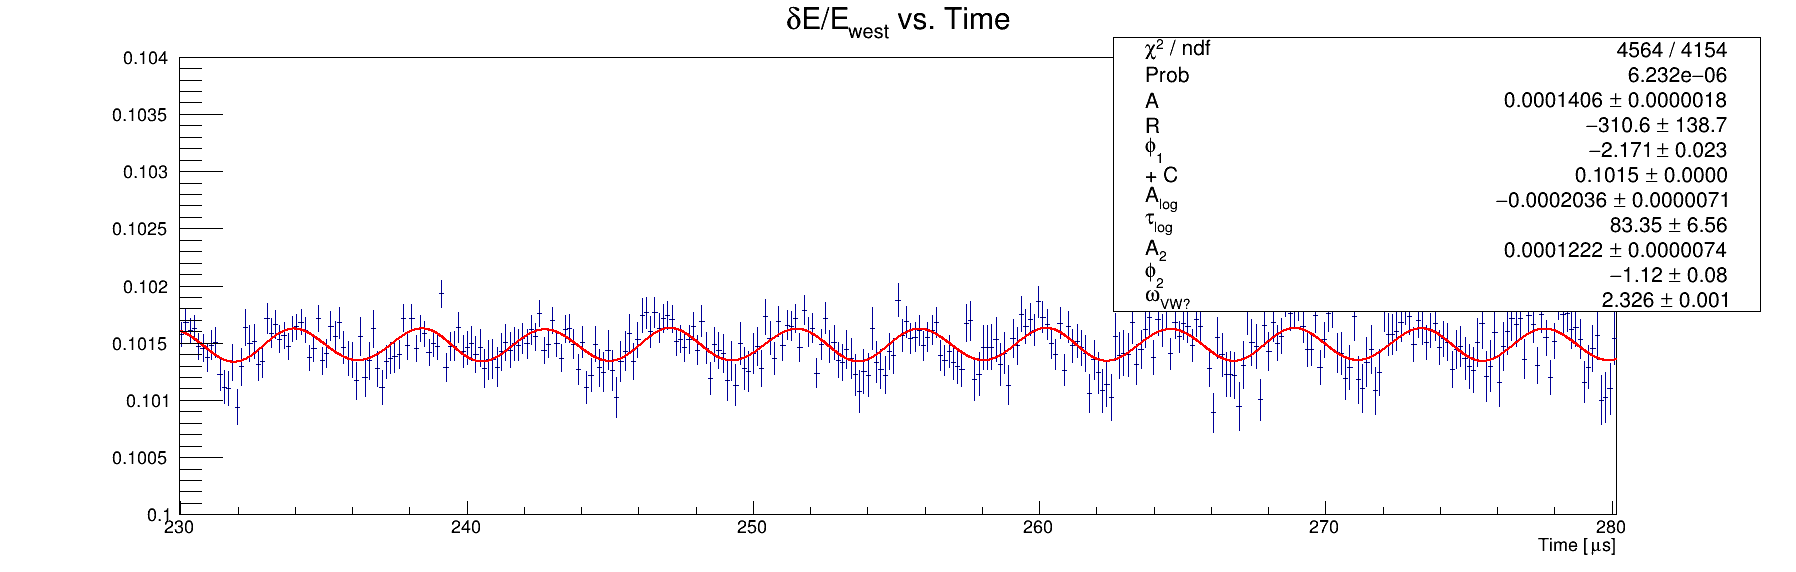

In [15]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(230,280)
#func1.Draw("same")
c.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


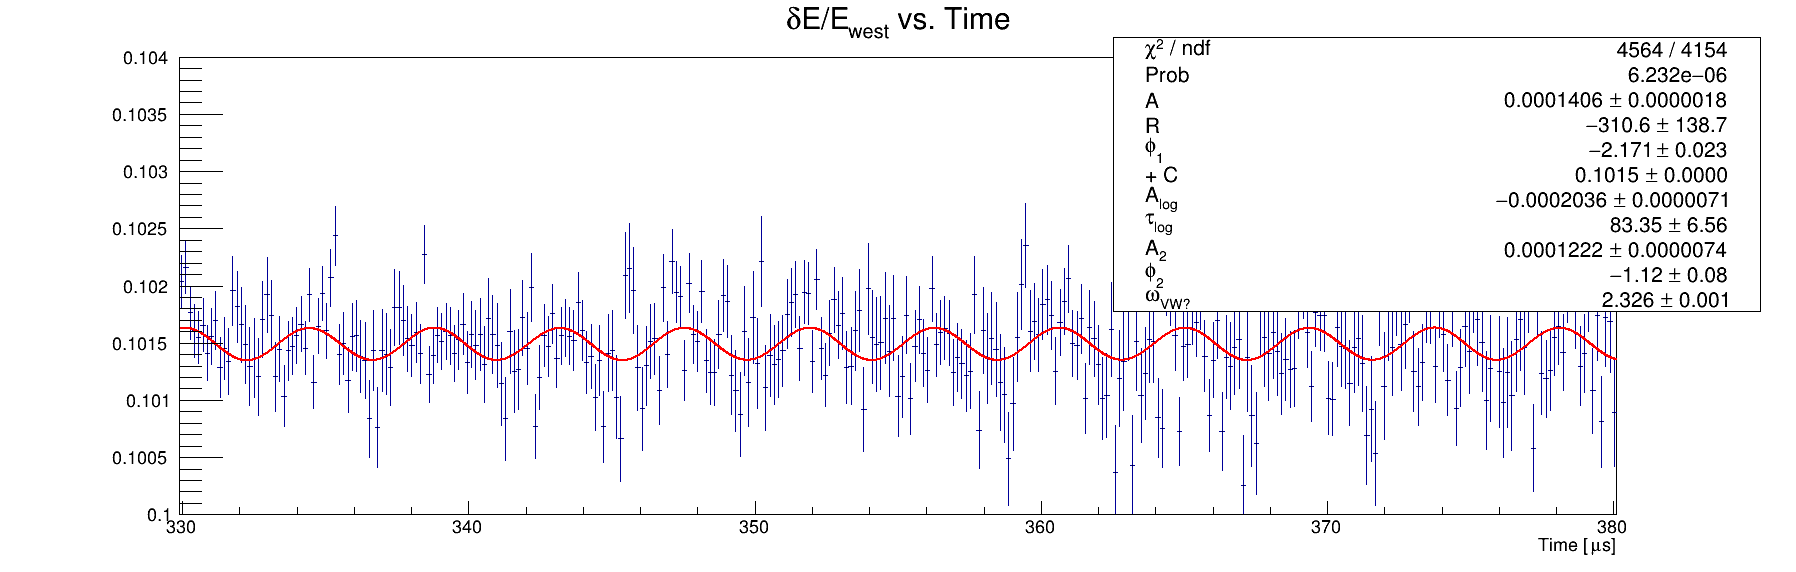

In [16]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(330,380)
#func1.Draw("same")
c.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


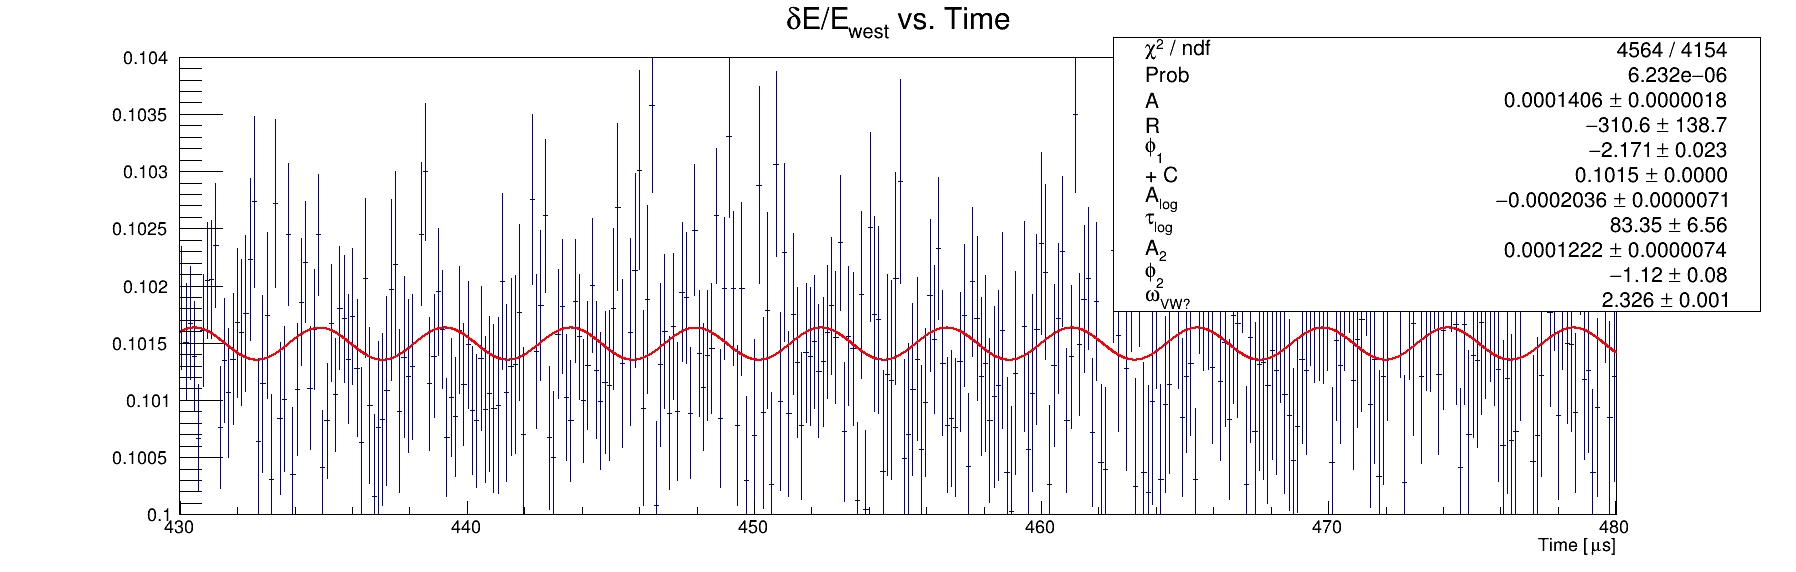

In [17]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(430,480)
#func1.Draw("same")
c.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


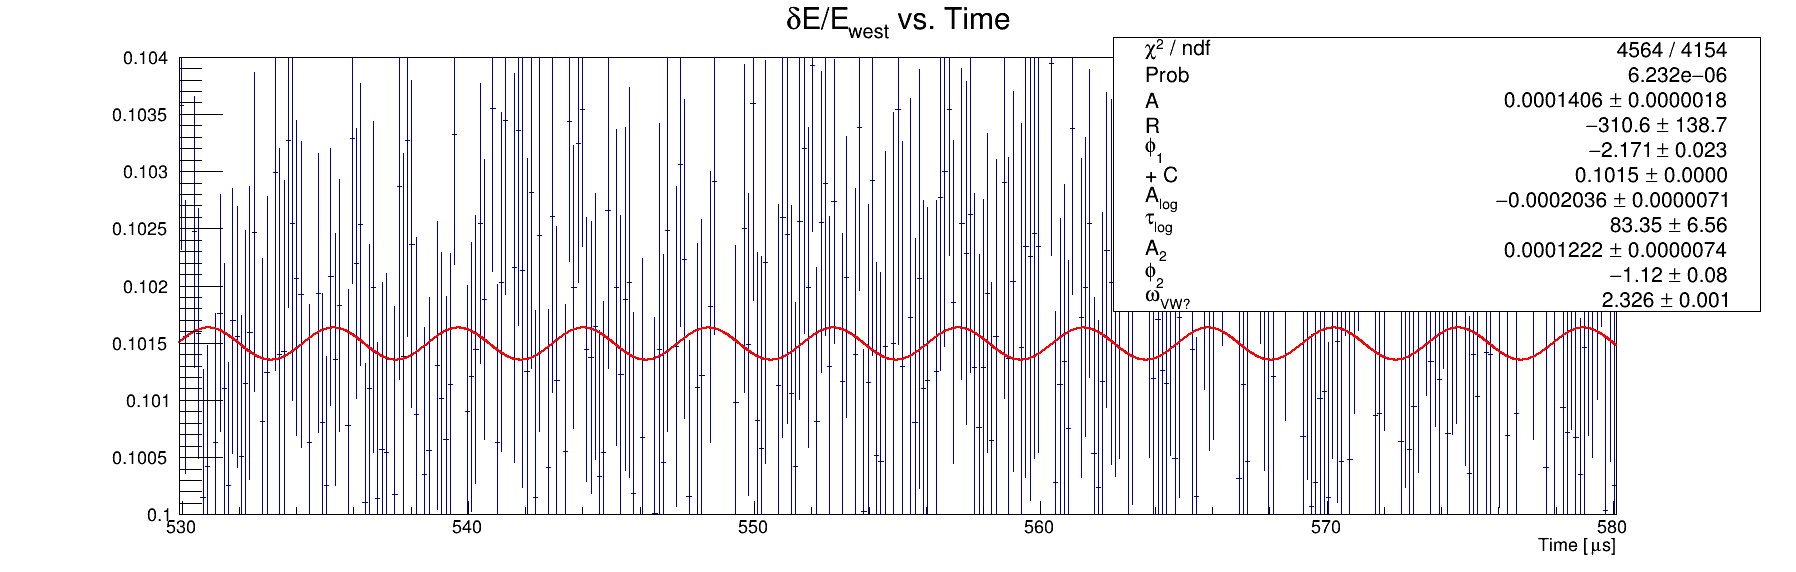

In [18]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(530,580)
#func1.Draw("same")
c.SetLogz()
c.Draw()

Creating new Ratio Plot


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


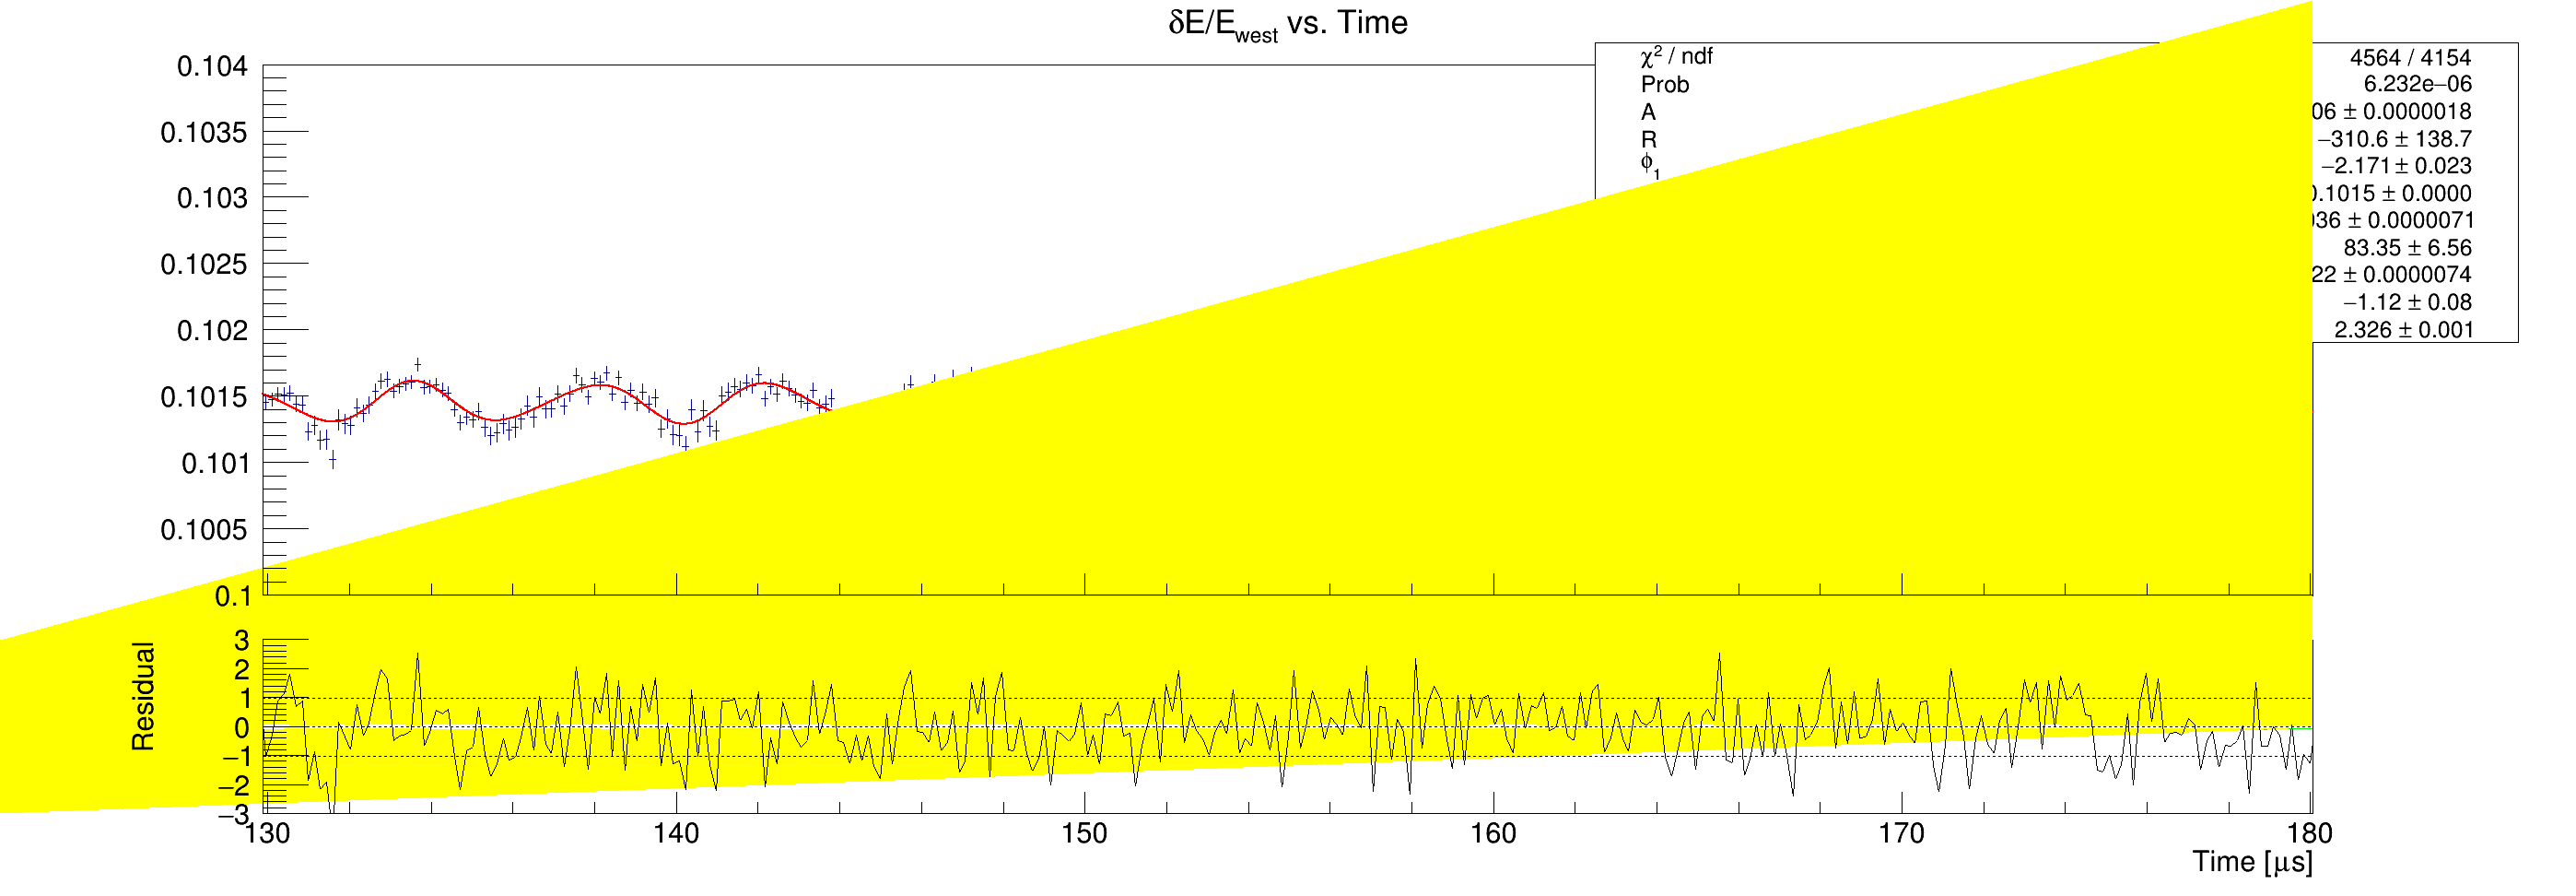

In [19]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas("c","c",2800,1000)
h2.Draw()
h2.GetXaxis().SetRangeUser(130,180)

c3.Draw()

try:
    rp1.Delete()
except:
    print("Creating new Ratio Plot")

try:
    rp1 = r.TRatioPlot(h2)
    rp1.Draw()
    rp1.GetLowerRefYaxis().SetTitle("Residual")
    rp1.GetLowerRefYaxis().SetRangeUser(-3,3)
except:
    print("ERROR: Could not create TRatioPlot. Probably too many fit functions on one histogram.")

c3.Update()
c3.Draw()

4164
4163 [(30.010638297872337, 3.310511950763151e-05), (30.159574468085104, -8.38223551045958e-06), (30.308510638297868, 2.4977399484635288e-05), (30.457446808510635, 1.5458654338704192e-05), (30.6063829787234, -2.0470075986850356e-05)]
4163 619.8723404255319 29.936188100847893 649.8085285263797
0.1489003940488907 0.0016132353950710512
13.431797899361571 6.715898949680785


Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


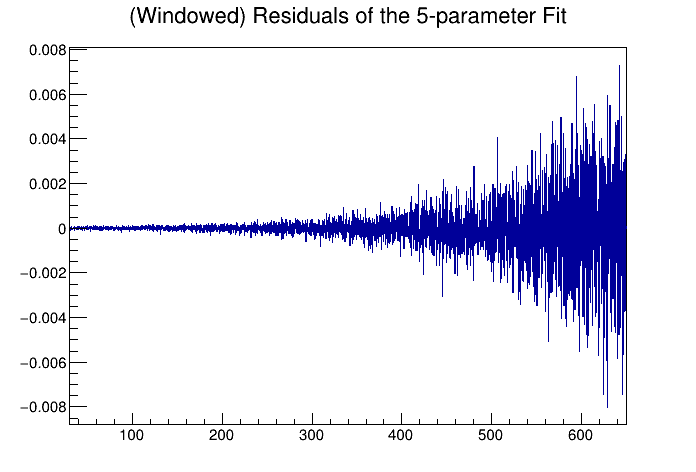

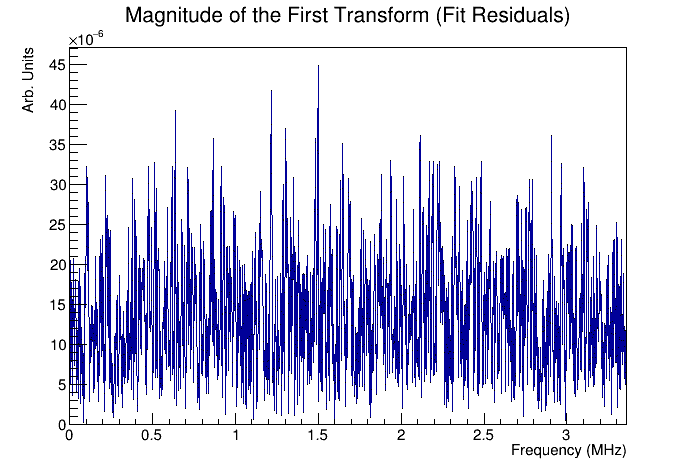

In [20]:
c3 = r.TCanvas()
residuals5param = h2.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
residVec = []
for i in range(nBins):
    binCenterX = h2.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30 and binCenterX < 650):
        residVec.append( (binCenterX, h2.GetBinContent(i) - func1.Eval(binCenterX) ) )
        residuals5param.SetBinContent(i, h2.GetBinContent(i) - func1.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
residuals5param.Delete()
residuals5param = htest
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

#apply a windows function to try to get rid of the imaginary peaks
welchVec = []
for i in range(nBins):
    unwindowed = residuals5param.GetBinContent(i)
    welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
    welchVec.append(welch)
    residuals5param.SetBinContent(i, unwindowed *  welch)
    
residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,700)
residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
c3.Draw()    
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (Fit Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

#c2.SetLogy()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Info in <TCanvas::SaveAs>: ROOT file ./resid.root has been created


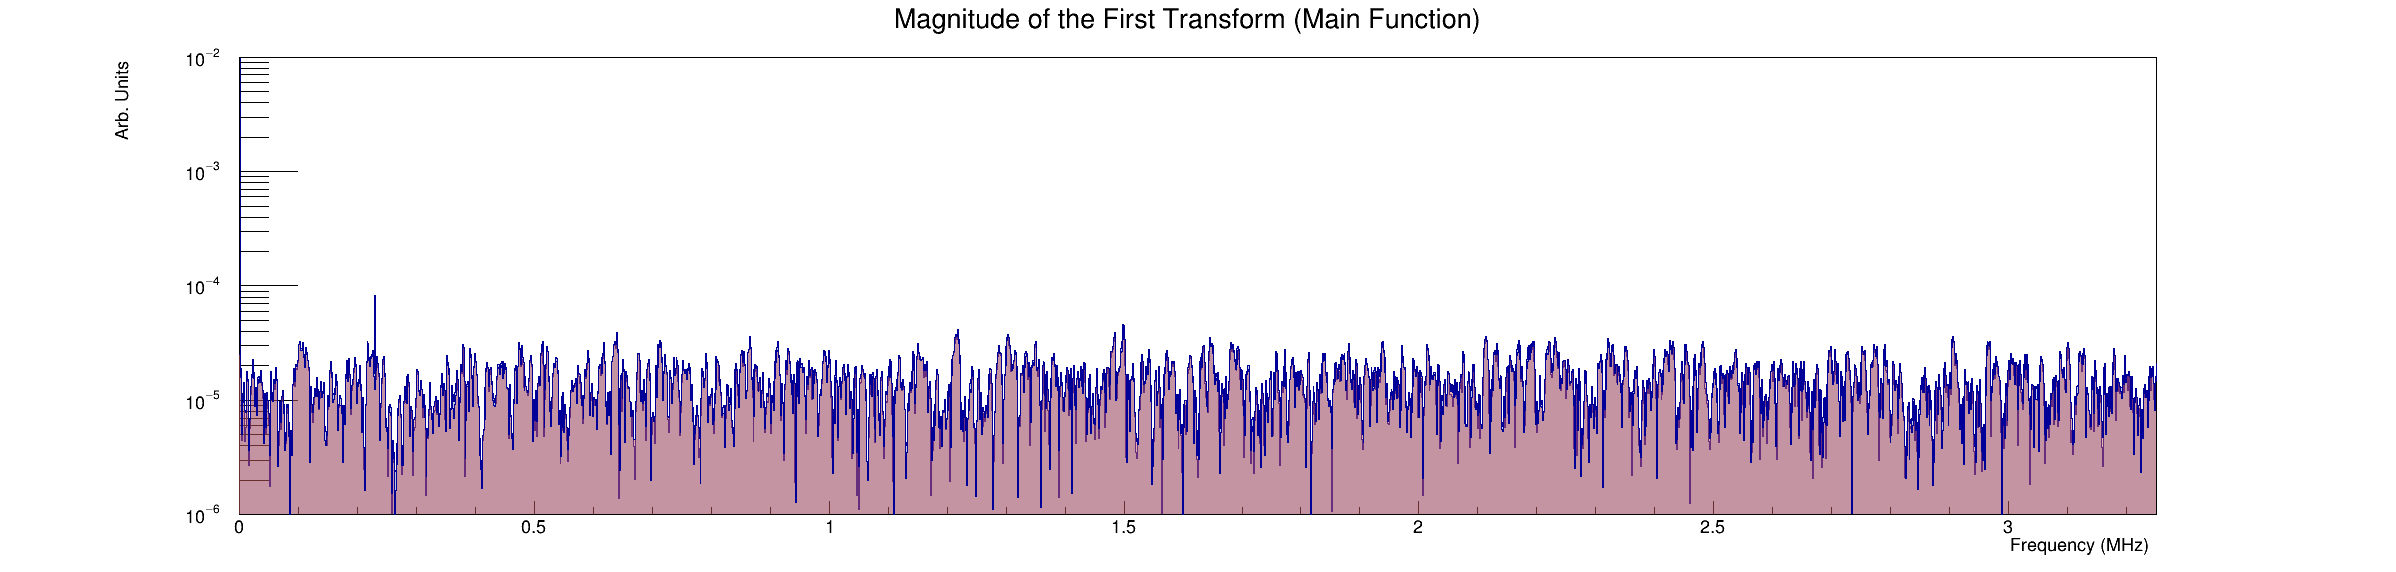

In [21]:
c2 = r.TCanvas("c","c",2400,600)
c2.cd()

ymin = 0.000001
ymax = 0.01
mainfuncfft.GetYaxis().SetRangeUser(ymin,ymax)
mainfuncfft.GetXaxis().SetRangeUser(0,3.25)

mainfuncfft.SetFillColorAlpha(38,.5)
residuals5paramXform.SetFillColorAlpha(46,.5)


mainfuncfft.Draw("HIST")
residuals5paramXform.Draw("hist same")


#hxform.GetYaxis().SetRangeUser(0,1.4)
c2.SetLogy()
#c2.SetGrid()
c2.Draw()
c2.Print("./resid.root")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./resid.root has been created


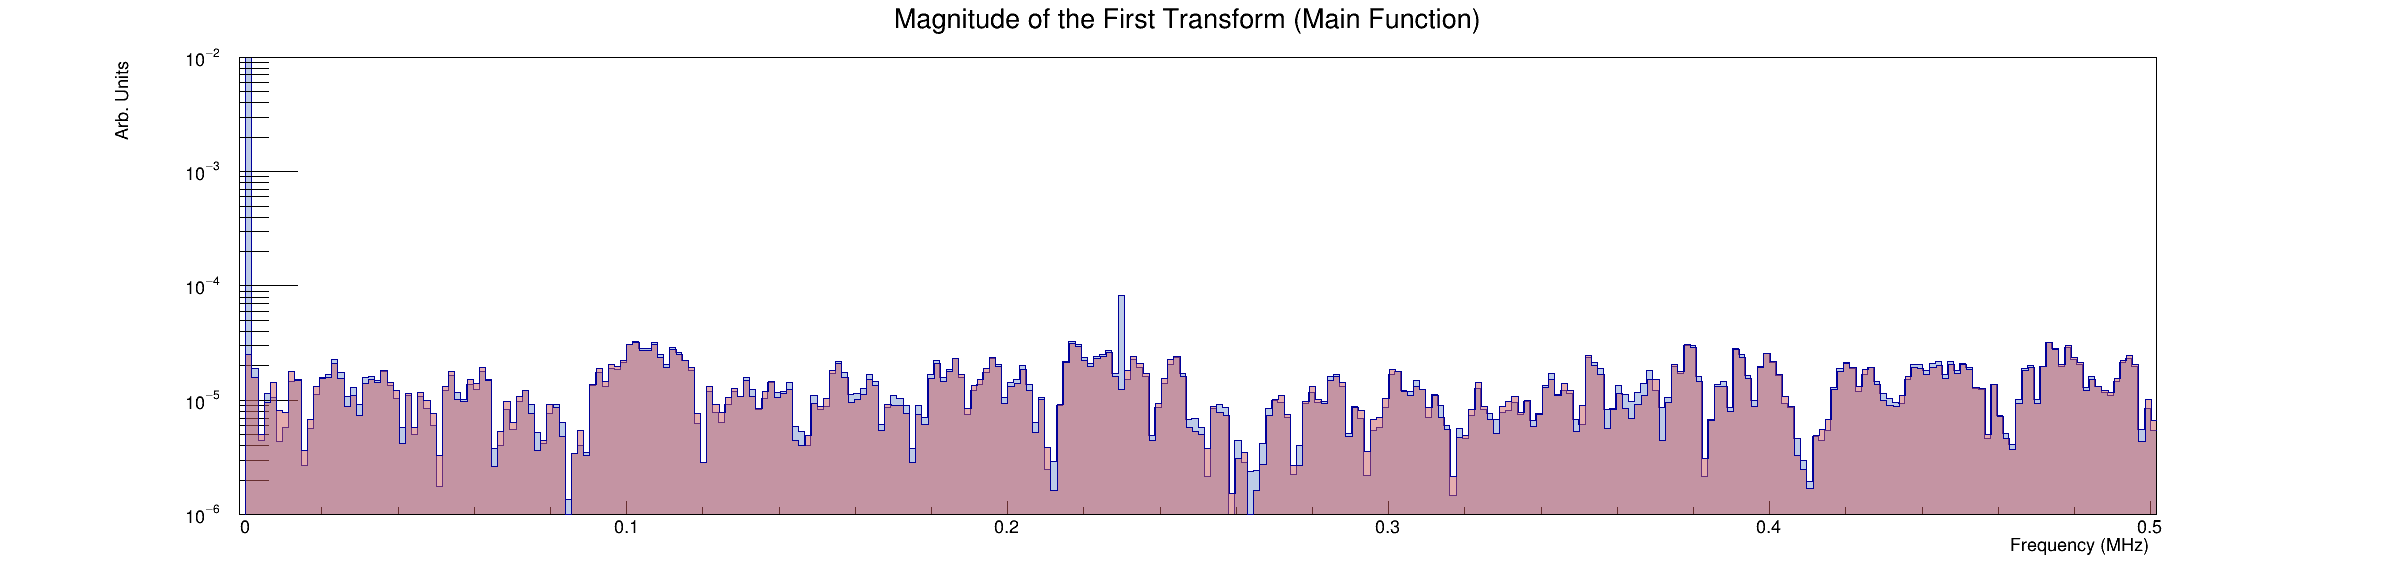

In [22]:
c2 = r.TCanvas("c","c",2400,600)
c2.cd()

ymin = 0.000001
ymax = 0.01
mainfuncfft.GetYaxis().SetRangeUser(ymin,ymax)
mainfuncfft.GetXaxis().SetRangeUser(-.01,.5)

mainfuncfft.SetFillColorAlpha(38,.5)
residuals5paramXform.SetFillColorAlpha(46,.5)


mainfuncfft.Draw("HIST")
residuals5paramXform.Draw("hist same")


#hxform.GetYaxis().SetRangeUser(0,1.4)
c2.SetLogy()
#c2.SetGrid()
c2.Draw()
c2.Print("./resid.root")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./resid.root has been created


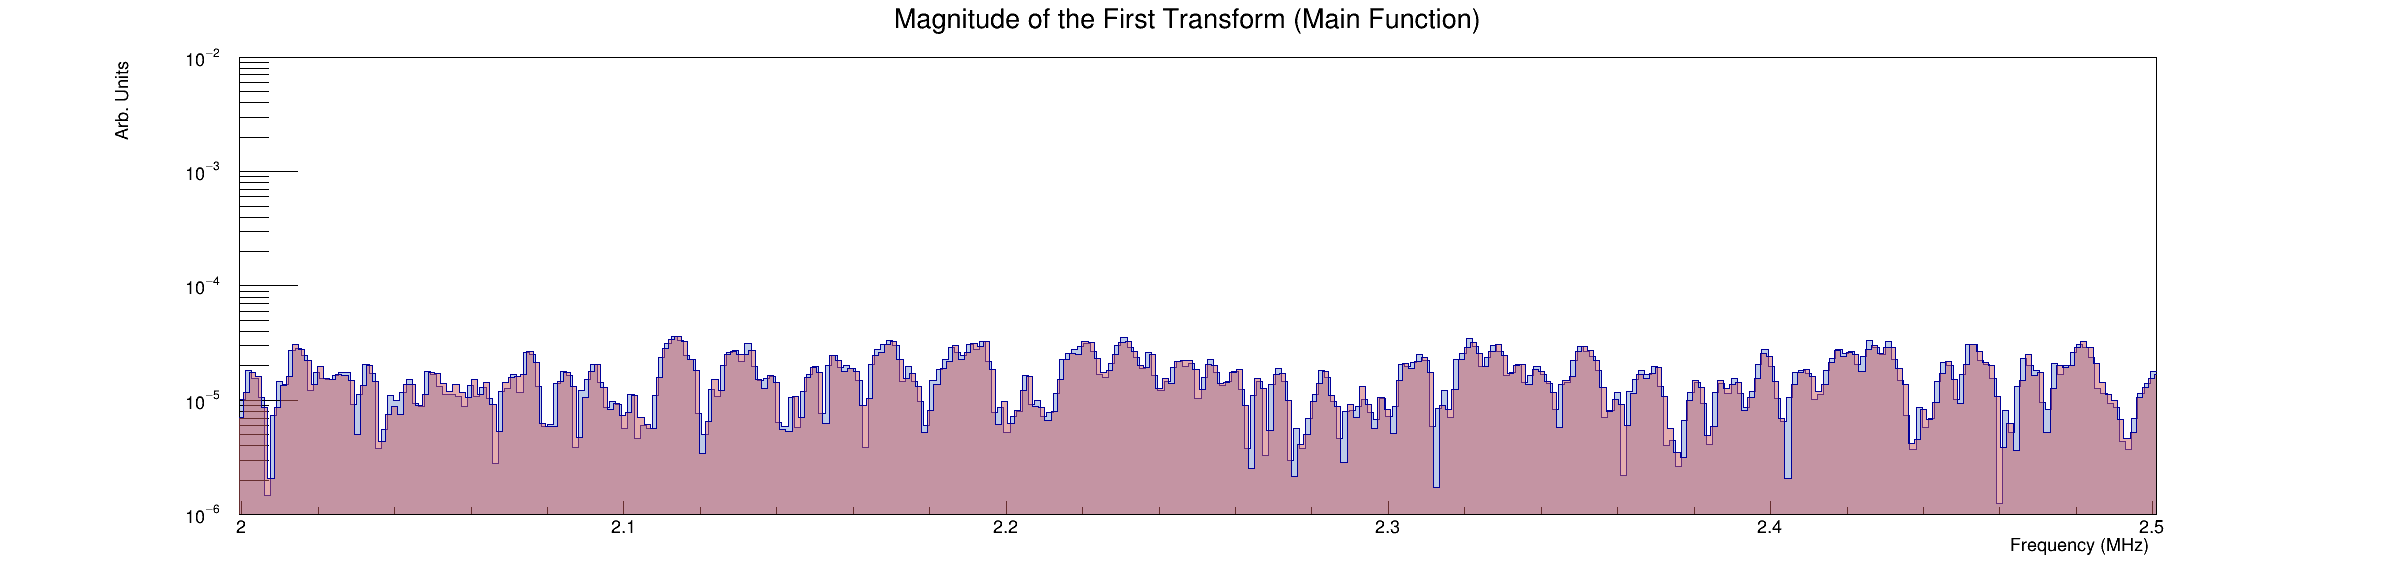

In [23]:
c2 = r.TCanvas("c","c",2400,600)
c2.cd()

ymin = 0.000001
ymax = 0.01
mainfuncfft.GetYaxis().SetRangeUser(ymin,ymax)
mainfuncfft.GetXaxis().SetRangeUser(2.0,2.5)

mainfuncfft.SetFillColorAlpha(38,.5)
residuals5paramXform.SetFillColorAlpha(46,.5)


mainfuncfft.Draw("HIST")
residuals5paramXform.Draw("hist same")


#hxform.GetYaxis().SetRangeUser(0,1.4)
c2.SetLogy()
#c2.SetGrid()
c2.Draw()
c2.Print("./resid.root")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

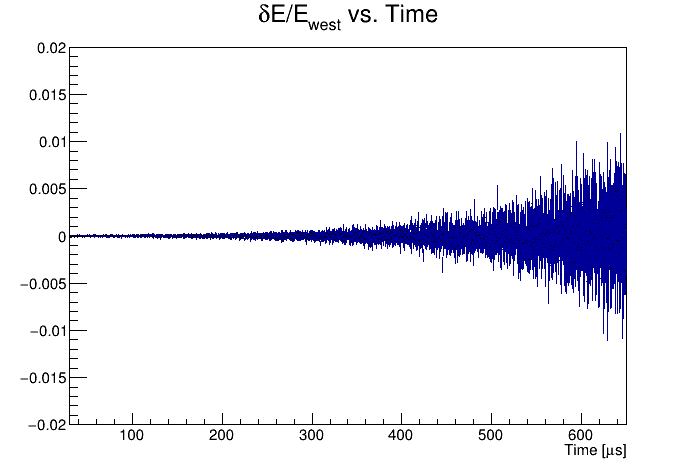

In [24]:
residuals5param = h2.ProjectionX("residuals5paramXform","e").Clone()
c = r.TCanvas()
residuals5param.Add(func1,-1,"")
residuals5param.GetYaxis().SetRangeUser(-0.02,0.02)
residuals5param.Draw()
c.Draw()


****************************************
Minimizer is Linear
Chi2                      =      5531.97
NDf                       =         4162
p0                        =  2.98764e-06   +/-   2.2657e-06  
p1                        = -3.10095e-08   +/-   1.9573e-08  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./resid.root has been created


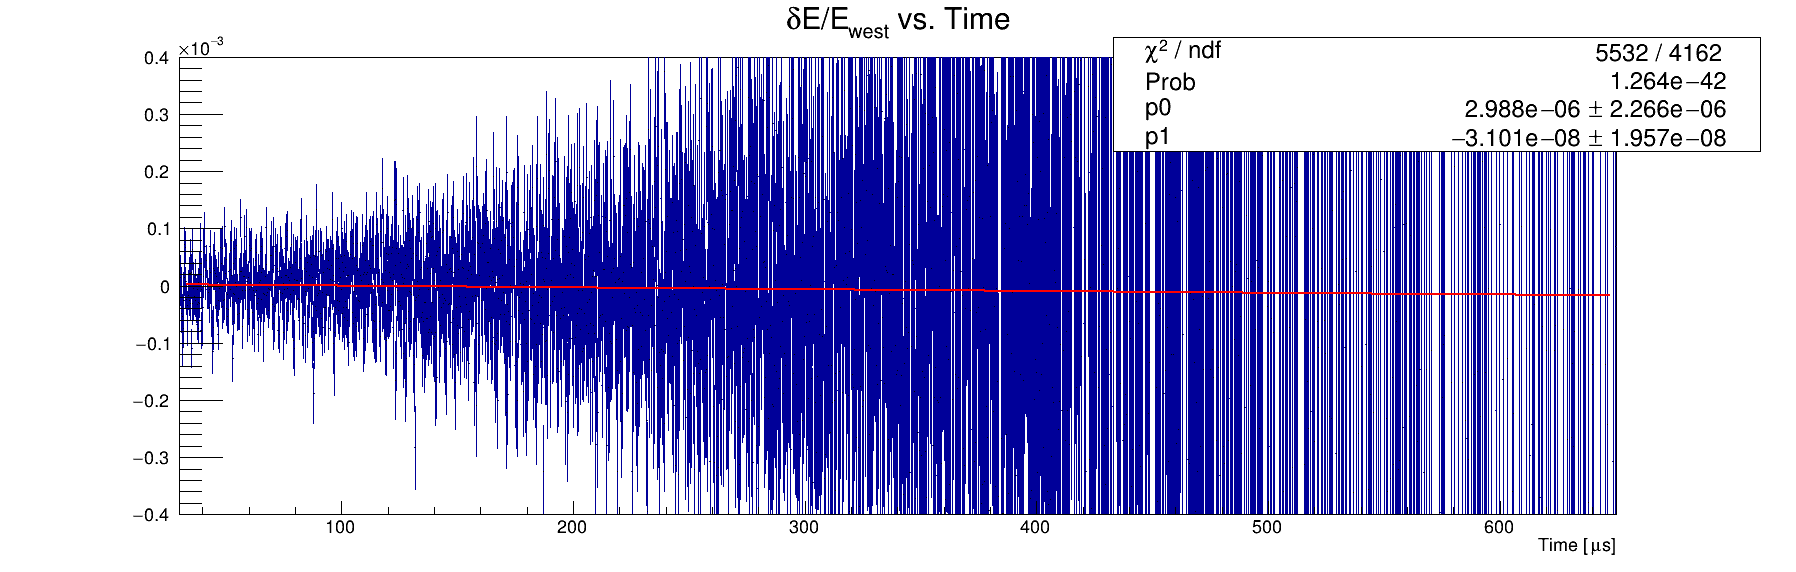

In [25]:
c2 = r.TCanvas("c","c",1800,600)
c2.cd()

residuals5param.Draw()
residuals5param.GetYaxis().SetRangeUser(-0.0004,0.0004)
residuals5param.GetXaxis().SetRangeUser(30,650)

residuals5param.Fit("pol1")

#hxform.GetYaxis().SetRangeUser(0,1.4)
#c2.SetLogy()
#c2.SetGrid()
c2.Draw()
c2.Print("./resid.root")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")


****************************************
Minimizer is Linear
Chi2                      =      5522.21
NDf                       =         4161
p0                        = -5.43692e-06   +/-   3.52186e-06 
p1                        =  1.26069e-07   +/-   5.39493e-08 
p2                        = -4.95205e-10   +/-   1.58492e-10 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./resid.root has been created


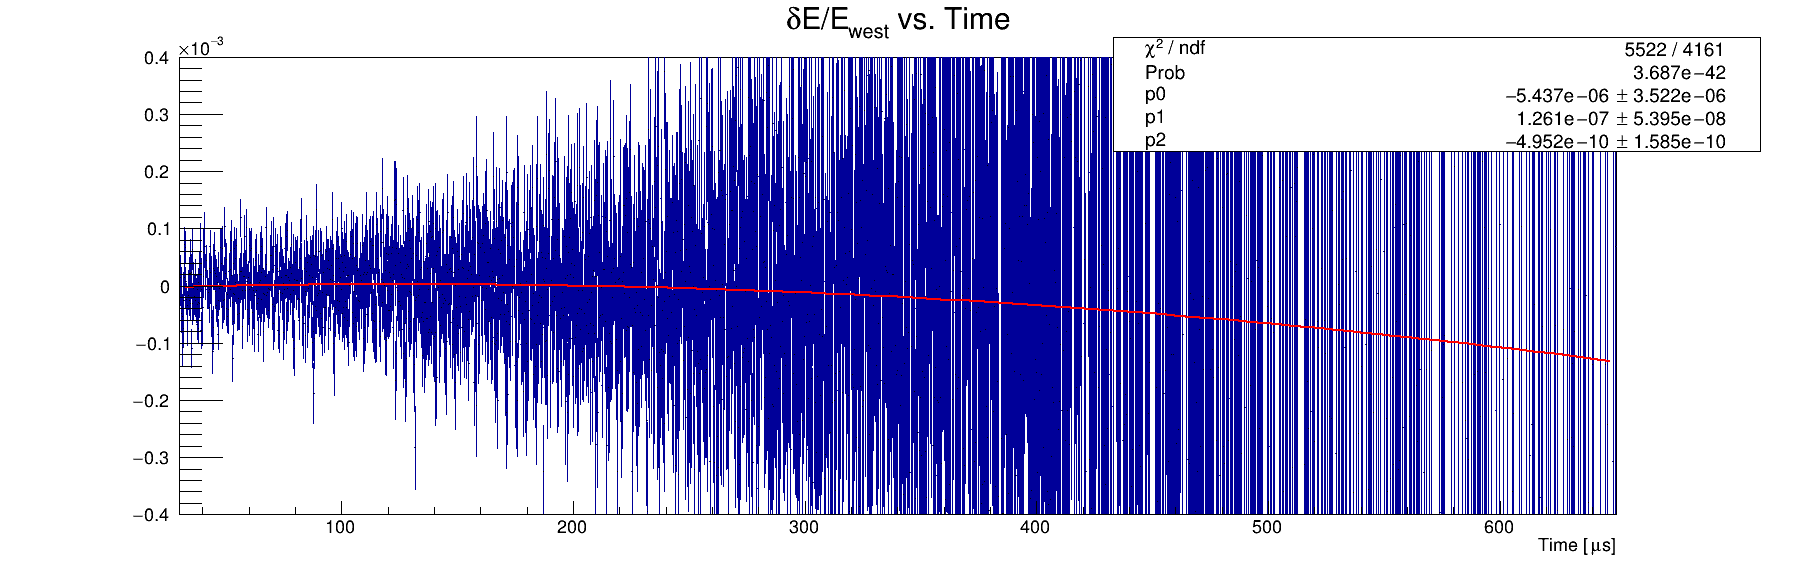

In [26]:
c2 = r.TCanvas("c","c",1800,600)
c2.cd()

residuals5param.Draw()
residuals5param.GetYaxis().SetRangeUser(-0.0004,0.0004)
residuals5param.GetXaxis().SetRangeUser(30,650)

residuals5param.Fit("pol2")

#hxform.GetYaxis().SetRangeUser(0,1.4)
#c2.SetLogy()
#c2.SetGrid()
c2.Draw()
c2.Print("./resid.root")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./resid.root has been created


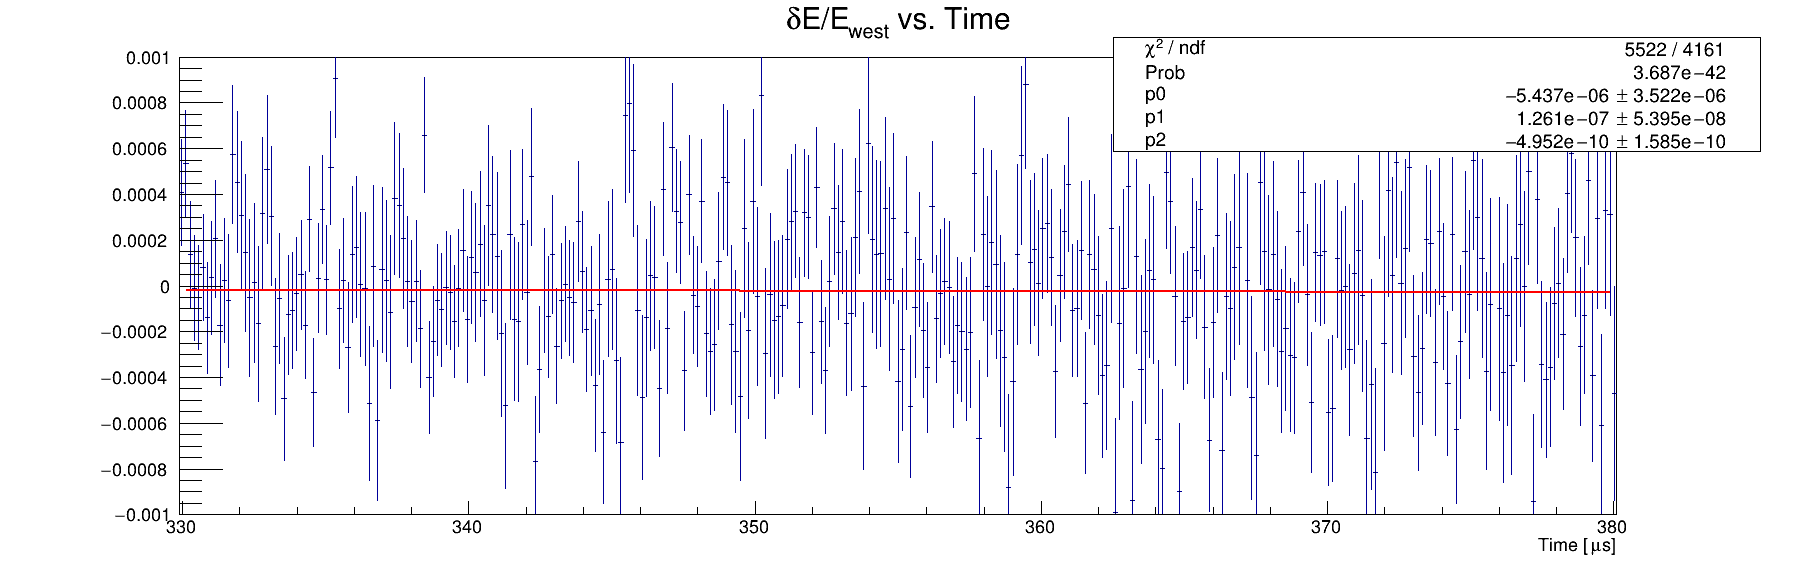

In [27]:
c2 = r.TCanvas("c","c",1800,600)
c2.cd()

residuals5param.Draw()
residuals5param.GetYaxis().SetRangeUser(-0.001,0.001)
residuals5param.GetXaxis().SetRangeUser(330,380)

#residuals5param.Fit("pol1")
#func2.SetParameters(0,0.0002,2.5,0)
#residuals5param.Fit("func2","remb")
#func2.Draw("SAME")


c2.Draw()
c2.Print("./resid.root")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

---

## And now lets move into energy bands of width 100 MeV

---
### delta E/E vs. t_{west}

In [8]:
#f2 = r.TFile("./data/resulthists.root")
f2 = r.TFile("./data/Hists_DeltaE_over_EnergyWest_vs_Time_By_EnergyRange_60hUnblinding_all.root")
f2.ls()

TFile**		./data/Hists_DeltaE_over_EnergyWest_vs_Time_By_EnergyRange_60hUnblinding_all.root	
 TFile*		./data/Hists_DeltaE_over_EnergyWest_vs_Time_By_EnergyRange_60hUnblinding_all.root	
  KEY: TH2D	h1;1	#deltaE/E_{west} For 100 < E_{west} < 200
  KEY: TH2D	h2;1	#deltaE/E_{west} For 200 < E_{west} < 300
  KEY: TH2D	h3;1	#deltaE/E_{west} For 300 < E_{west} < 400
  KEY: TH2D	h4;1	#deltaE/E_{west} For 400 < E_{west} < 500
  KEY: TH2D	h5;1	#deltaE/E_{west} For 500 < E_{west} < 600
  KEY: TH2D	h6;1	#deltaE/E_{west} For 600 < E_{west} < 700
  KEY: TH2D	h7;1	#deltaE/E_{west} For 700 < E_{west} < 800
  KEY: TH2D	h8;1	#deltaE/E_{west} For 800 < E_{west} < 900
  KEY: TH2D	h9;1	#deltaE/E_{west} For 900 < E_{west} < 1000
  KEY: TH2D	h10;1	#deltaE/E_{west} For 1000 < E_{west} < 1100
  KEY: TH2D	h11;1	#deltaE/E_{west} For 1100 < E_{west} < 1200
  KEY: TH2D	h12;1	#deltaE/E_{west} For 1200 < E_{west} < 1300
  KEY: TH2D	h13;1	#deltaE/E_{west} For 1300 < E_{west} < 1400
  KEY: TH2D	h14;1	#deltaE/E_{west} F

1 <ROOT.TH2D object ("h1") at 0x7f7d106d6390>
2 <ROOT.TH2D object ("h2") at 0x7f7d10417100>
3 <ROOT.TH2D object ("h3") at 0x7f7d104126f0>
4 <ROOT.TH2D object ("h4") at 0x7f7d103d7aa0>
5 <ROOT.TH2D object ("h5") at 0x7f7d104079e0>
6 <ROOT.TH2D object ("h6") at 0x7f7d10424b40>
7 <ROOT.TH2D object ("h7") at 0x7f7d10424f90>
8 <ROOT.TH2D object ("h8") at 0x7f7d1049d1f0>
9 <ROOT.TH2D object ("h9") at 0x7f7d1040e890>
10 <ROOT.TH2D object ("h10") at 0x7f7d103fe6b0>
11 <ROOT.TH2D object ("h11") at 0x7f7d1049cda0>
12 <ROOT.TH2D object ("h12") at 0x7f7d103e6c60>
13 <ROOT.TH2D object ("h13") at 0x7f7d10423e00>
14 <ROOT.TH2D object ("h14") at 0x7f7d104185e0>
15 <ROOT.TH2D object ("h15") at 0x7f7d1049c060>
16 <ROOT.TH2D object ("h16") at 0x7f7d103fcfd0>
17 <ROOT.TH2D object ("h17") at 0x7f7d106e3780>
18 <ROOT.TH2D object ("h18") at 0x7f7d1041ecb0>
19 <ROOT.TH2D object ("h19") at 0x7f7d104403e0>
20 <ROOT.TH2D object ("h20") at 0x7f7d10419270>
21 <ROOT.TH2D object ("h21") at 0x7f7d103ffc20>
22 <ROOT.T

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/001_deltaE_over_E_zoom.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/002_deltaE_over_E_zoom.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/003_deltaE_over_E_zoom.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/004_deltaE_over_E_zoom.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/005_deltaE_over_E_zoom.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/006_deltaE_over_E_zoom.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with sa

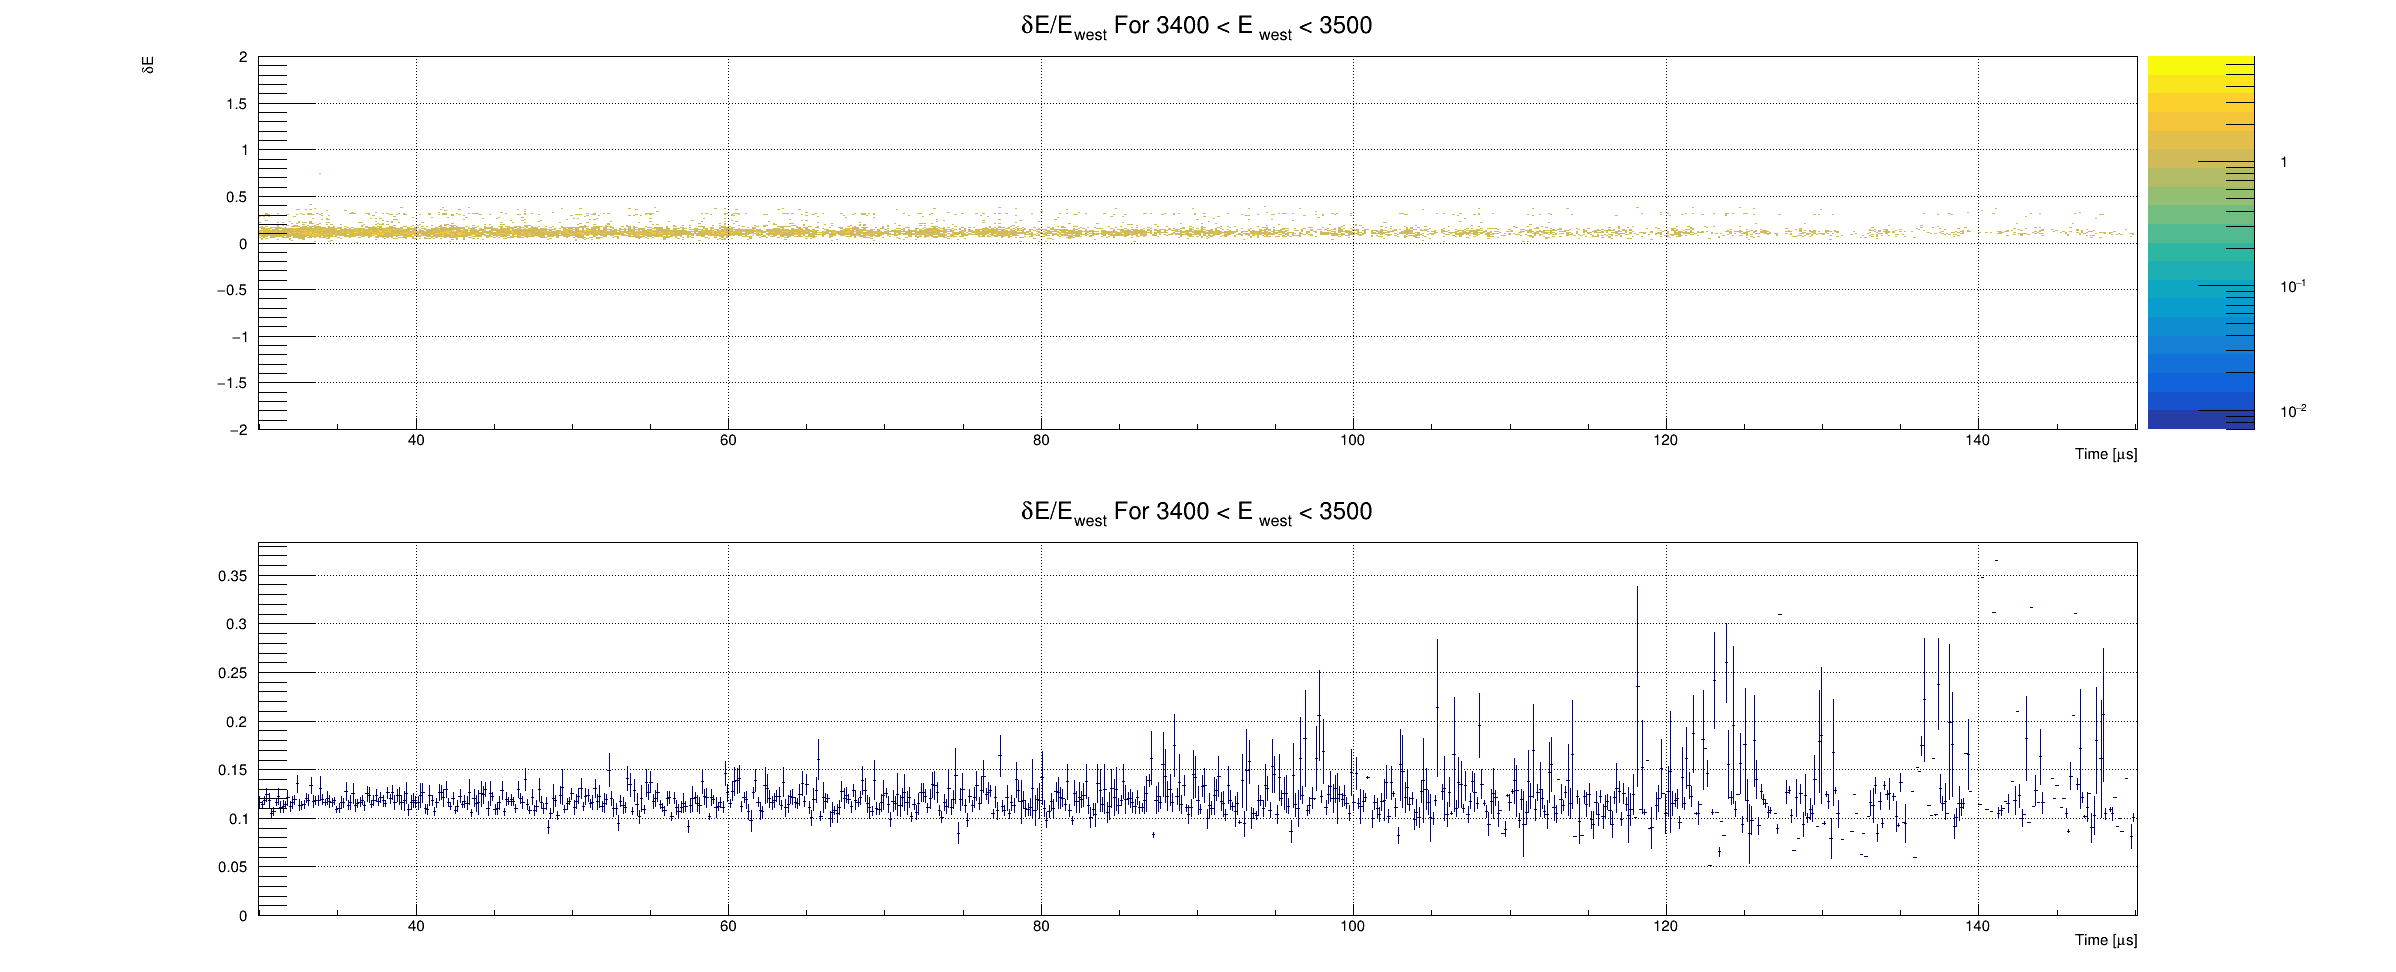

In [30]:
for elow in range(1,35):
    try:
        print(elow, f2.Get("h"+str(elow)))
    except:
        print("Error: h"+str(elow)+" not found")
      
    
    hi = f2.Get("h"+str(elow)).Clone()
    
    c = r.TCanvas("c","c",2400,1000)
    c.Divide(1,2)
    c.cd(1)
    hi.GetXaxis().SetRangeUser(30,150)
    hi.GetYaxis().SetRangeUser(-2,2)
    hi.Draw("colz")
    r.gPad.SetLogz()
    r.gPad.SetGrid()
    c.cd(2)
    hi2 = hi.ProfileX().Clone("hi2")
    #hi2.GetXaxis().SetRangeUser(30,150)
    #hi2.GetYaxis().SetRangeUser(0.95,0.114)
    hi2.Draw("")
    r.gPad.SetGrid()
    #hi2.Fit("pol1")
    #c.SetGrid()
    c.Draw()
    c.Print("./images/"+str(elow).zfill(3)+"_deltaE_over_E_zoom.png")
    

---

## And now adding all of the energy ranges together

---

In [15]:
startpoint = 17
endpoint = 17
hAll = f2.Get("h"+str(startpoint)).Clone()
title = "#deltaE/E_{west} for "+str(startpoint*100)+" < E_{west} < "+str(endpoint*100 + 100)+" MeV; Time [#mus]; #deltaE/E_{west}"
hAll.SetTitle(title)
for i in range(startpoint+1,endpoint):
    hi2 = f2.Get("h"+str(i))
    hAll.Add(hi2)

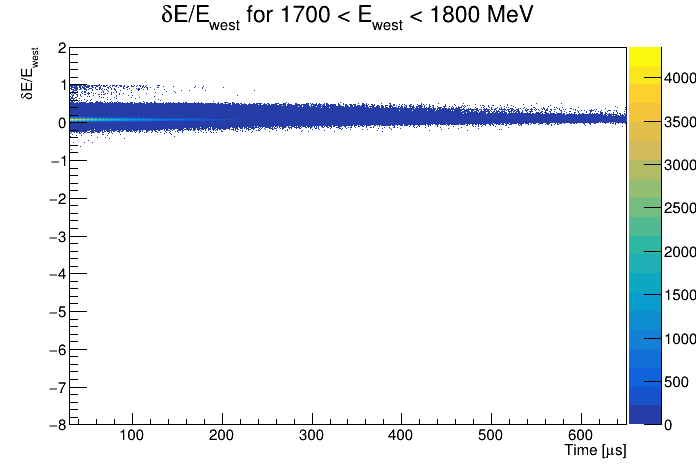

In [16]:
c = r.TCanvas()
hAll.SetTitle(title)
hAll.GetXaxis().SetRangeUser(30,650)
hAll.Draw("colz")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


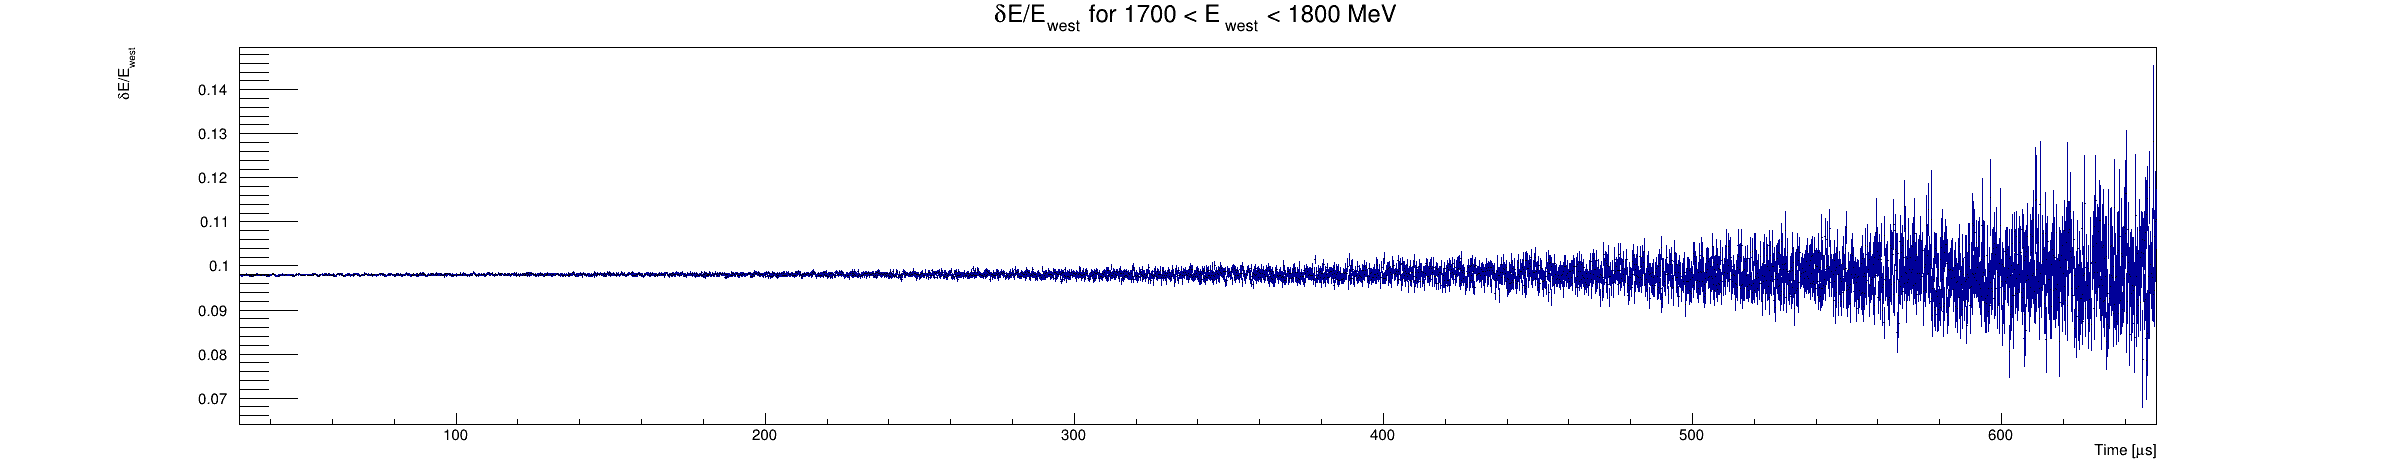

In [17]:
c = r.TCanvas("c","c",2400,500)
hAll2 = hAll.ProfileX().Clone("hAll2")
hAll2.SetTitle(title)
hAll2.GetXaxis().SetRangeUser(30,650)
#hAll2.GetYaxis().SetRangeUser(0.095,0.115)
hAll2.Draw("")
#hi2.Fit("pol1")
#c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


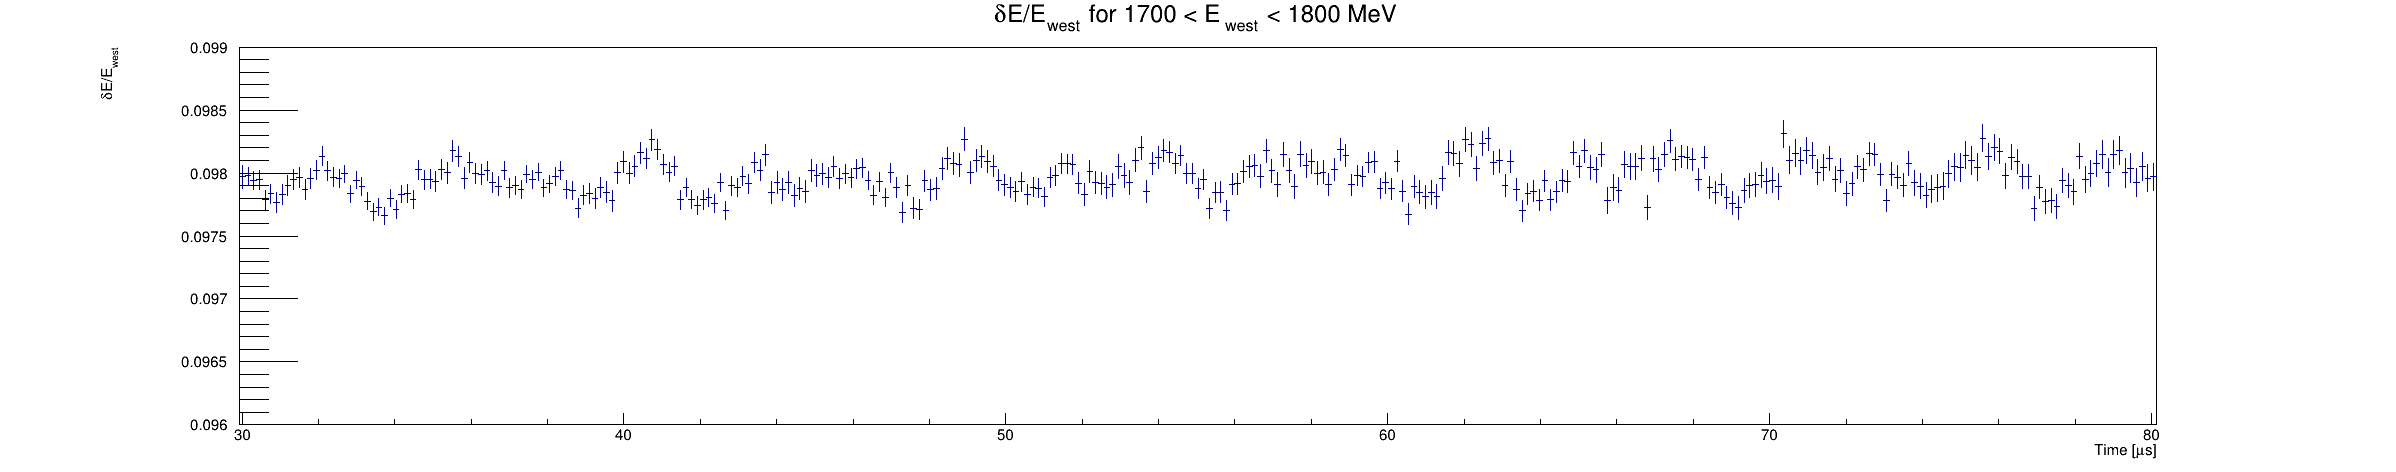

In [21]:
c = r.TCanvas("c","c",2400,500)
hAll2.GetYaxis().SetRangeUser(0.096,0.099)
hAll2.GetXaxis().SetRangeUser(30,80)
hAll2.Draw("")
#hi2.Fit("pol1")
#c.SetGrid()
c.Draw()

---

### Lets get the FFT of this plot

4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


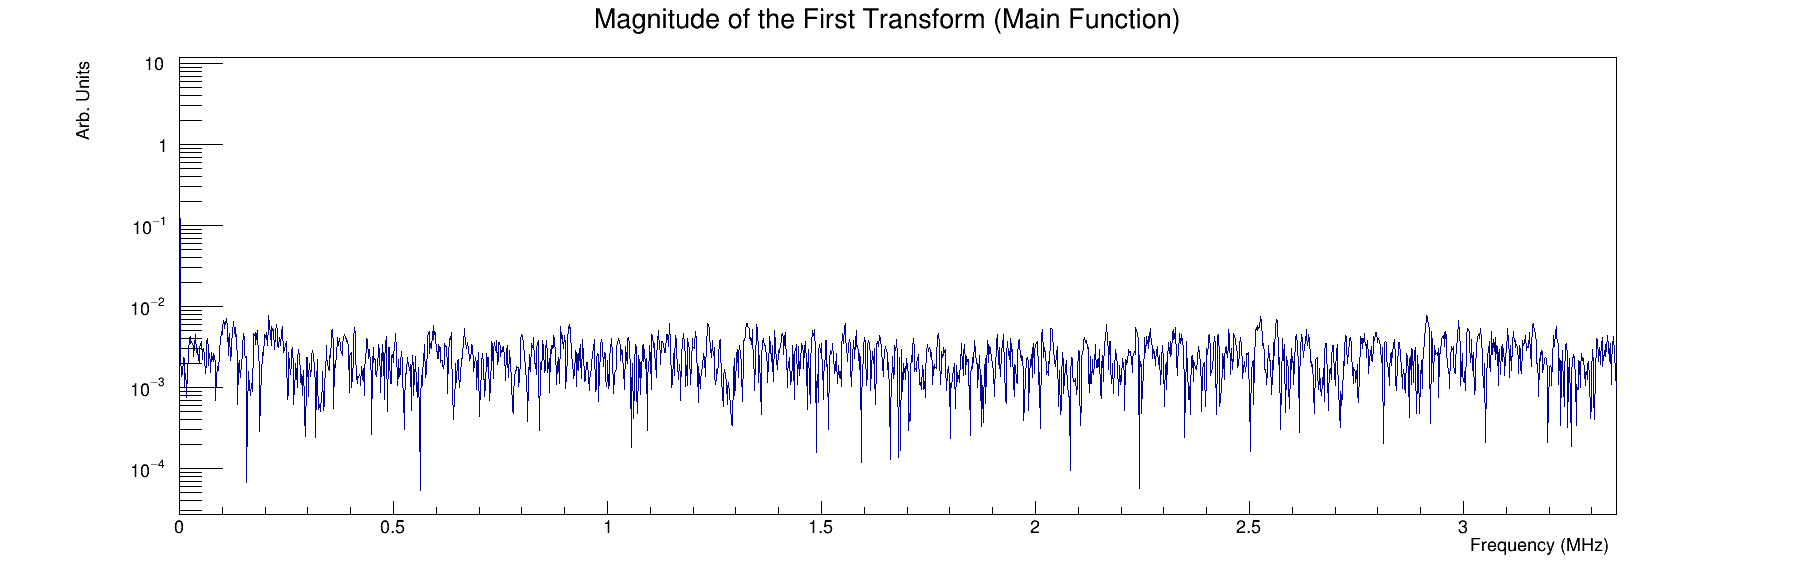

In [22]:
c3 = r.TCanvas("c","c",1800,600)
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = hAll2.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (Main Function)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/r.TMath.Sqrt(normXform))
c2 = r.TCanvas("c","c",1800,600)
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = hAll2.GetSize() -2
minBinCenter = hAll2.GetXaxis().GetBinCenter(0)
maxBinCenter = hAll2.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = hAll2.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

hAll2_FFT = hxform.Clone()

c2.SetLogy()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

---

### and now fit

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


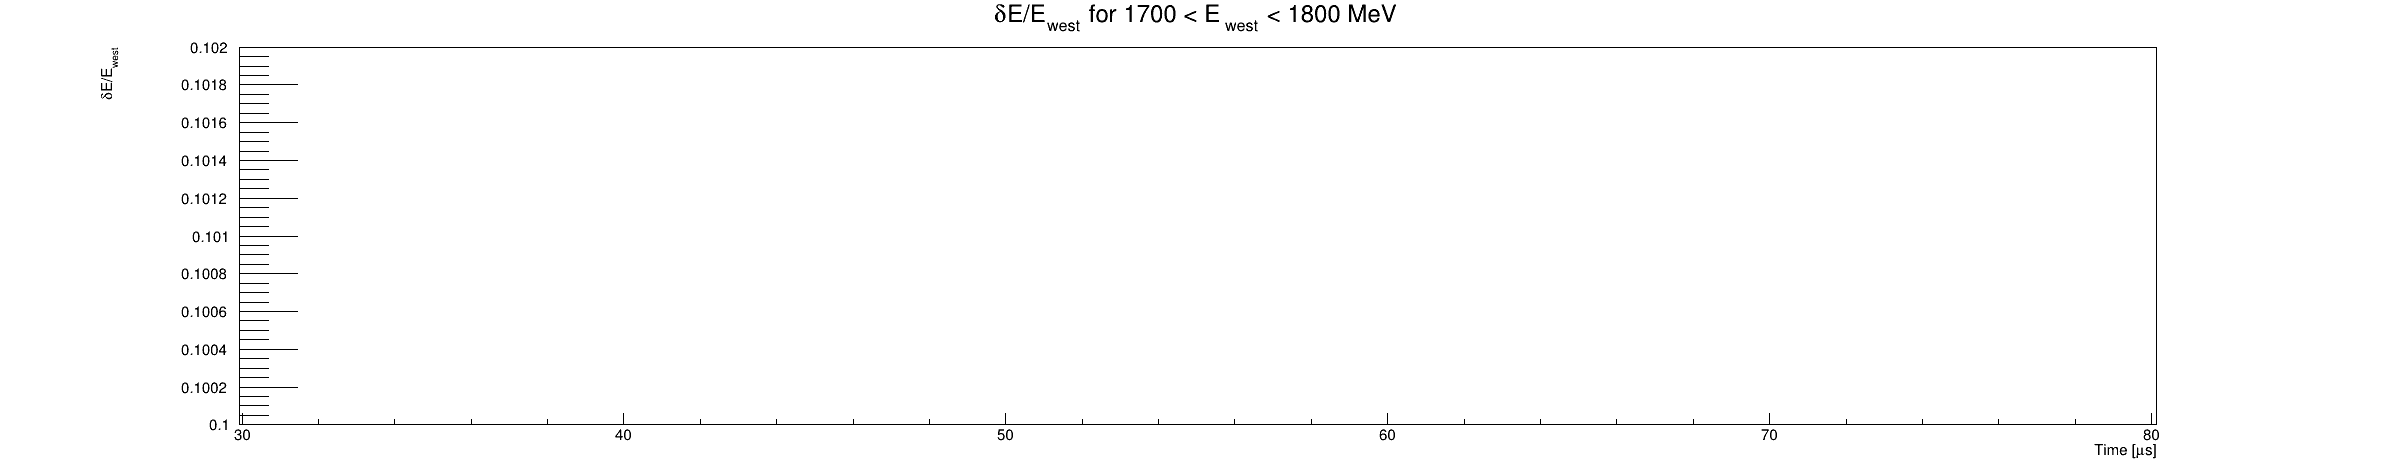

In [23]:
c = r.TCanvas("c","c",2400,500)
hAll2.GetXaxis().SetRangeUser(30,80)
hAll2.GetYaxis().SetRangeUser(0.10,0.102)
hAll2.Draw("")
#hAll2.Fit("pol1")
#c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


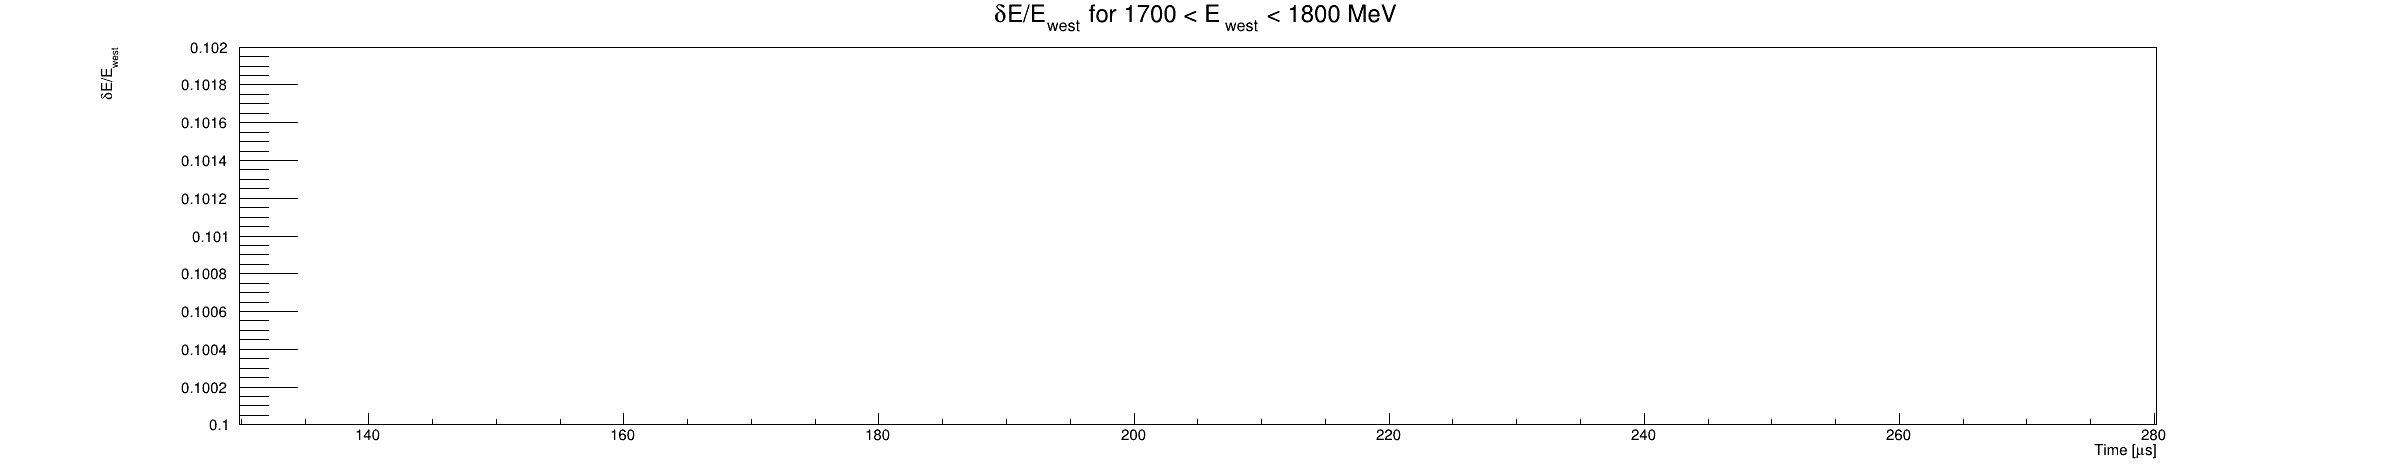

In [24]:
c = r.TCanvas("c","c",2400,500)
hAll2.GetXaxis().SetRangeUser(130,280)
#hAll2.GetYaxis().SetRangeUser(0.07,0.12)
hAll2.Draw("")
#hAll2.Fit("pol1")
#c.SetGrid()
c.Draw()

In [69]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def peak_fit_sine(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return ( (p[0]*r.TMath.Sin(omega*x[0] + p[2]))#*r.TMath.Exp(-x[0]/p[9]) 
            + p[9]*r.TMath.Sin(2*omega*x[0] + p[10])*r.TMath.Exp(-x[0]/p[5])  
            #+ p[7]*r.TMath.Sin(p[9]*omega*x[0] + p[8])
            + p[3] #+ p[4]*x[0] + p[5]*(x[0] - p[6])**2
            + p[4]*r.TMath.Exp(-x[0]/p[5])
            + p[6]*r.TMath.Sin(p[8]*x[0] + p[7])*r.TMath.Exp(-x[0]/p[5]) 
            #+ p[11]*r.TMath.Sin(p[12]*x[0] + p[13])*r.TMath.Exp(-x[0]/p[5]) 
            #+ p[9]*x[0]
           )

func3 = r.TF1("simplesine_ranges", peak_fit_sine, 30,650,11)
#func1.SetParNames('A','R','#phi_{1}','+ C', 'm', 'a_{quad}', 'c_{quad}' )
func3.SetParNames('A','R','#phi_{1}','+ C', 'A_{log}', #0-4
                  '#tau_{log}', 'A_{VW?}', '#phi_{VW?}', '#omega_{VW?}', 'A_{#omegaa-2}',  #5-9
                  '#phi_{#omegaa-2}') #10-14
func3.SetParName(11,'A_{CBO?}')
func3.SetParName(12, '#omega_{CBO?}')
func3.SetParName(13, '#phi_{CBO?}')
func3.SetParameters(0.0001,0,0.6,0.1015,-0.001,100)
#func1.SetParLimits(4,-100000000,-0.0000000000000000001) #avoid divide by zero errors
#func1.SetParLimits(7,1,10**15) #avoid divide by zero errors
#func3.SetParLimits(2,-6.3,6.3)
#func3.SetParLimits(7,-6.3,6.3)
func3.SetLineColor(2)
func3.SetNpx(5000)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


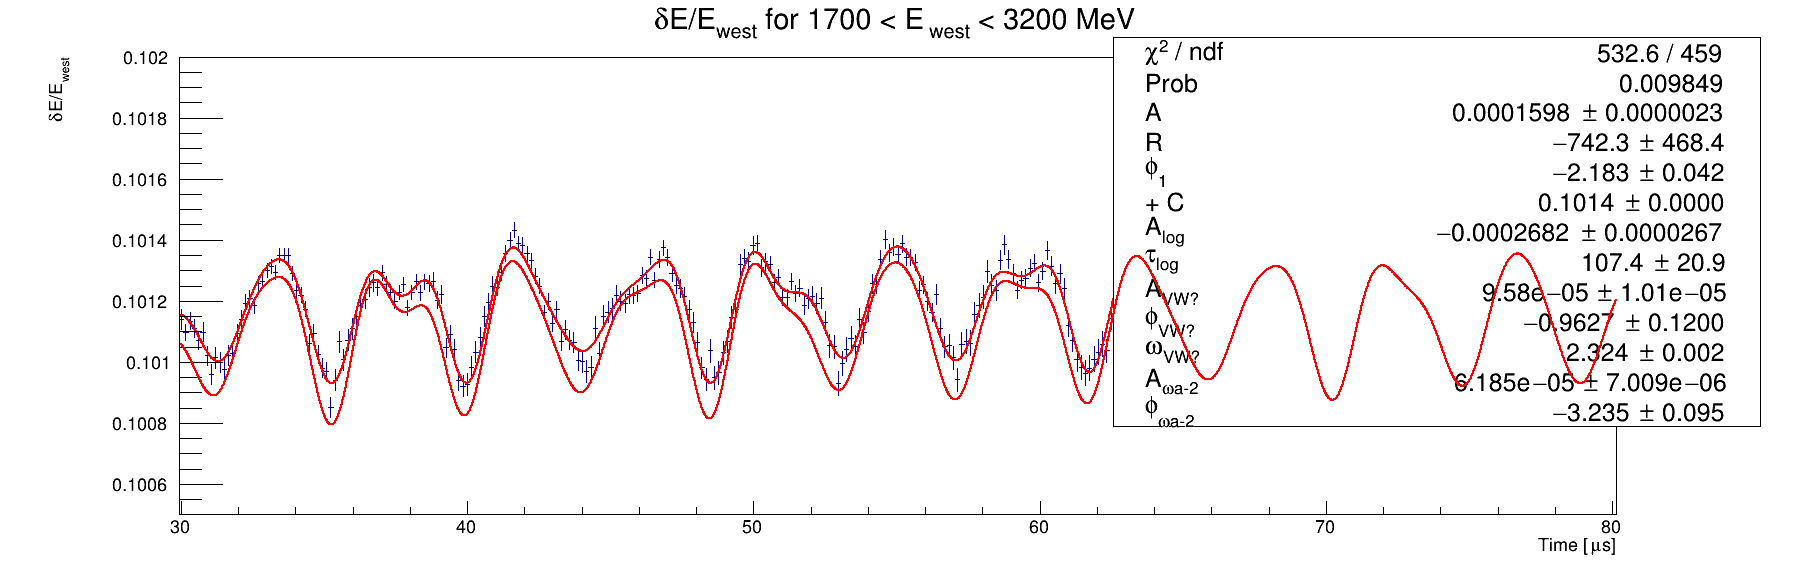

In [70]:
c = r.TCanvas("c","c",1800,600)
hAll2.Draw()
hAll2.GetXaxis().SetRangeUser(30,80)

#func3.SetParameters(0.0001,0,0.6,0.07015,0.001,100,-0.000001,0,2.3,1000,0.000000001)
func3.SetParameters(0.0002,0,-2.1,0.1012,-0.0002,60,0.0001222,-1.12,2.326,0.0001,-3.14)
func3.SetParameter(11,0.0001)
func3.SetParameter(12,0.35)
func3.SetParameter(13,-3.14/4)
func3.Draw("SAME")
c.SetLogz()
c.Draw()

Starting Fit 1
 FCN=4318.45 FROM MINOS     STATUS=SUCCESSFUL     84 CALLS        2673 TOTAL
                     EDM=5.81098e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.63598e-04   1.83199e-06  -1.50864e-08  -8.03765e+00
   2  R           -2.71530e+02   1.16444e+02   2.94132e-02   8.64036e-06
   3  #phi_{1}    -2.22889e+00   1.95896e-02  -1.20894e-06  -5.98469e-02
   4  + C          1.01309e-01   5.02961e-06  -3.57815e-09  -3.71131e+01
   5  A_{log}     -2.13912e-04   6.93369e-06  -2.22833e-09  -3.19686e+01
   6  #tau_{log}   8.44572e+01   6.36716e+00  -9.65259e-03   4.20083e-05
   7  A_{VW?}      1.11633e-04   6.88906e-06  -3.25326e-09   3.00826e+01
   8  #phi_{VW?}  -1.09341e+00   8.47104e-02  -3.36572e-06  -9.38521e-03
   9  #omega_{VW?}   2.32642e+00   1.31669e-03  -2.75947e-07  -3.03890e-01
  10  A_{#omegaa-2}   7.4

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


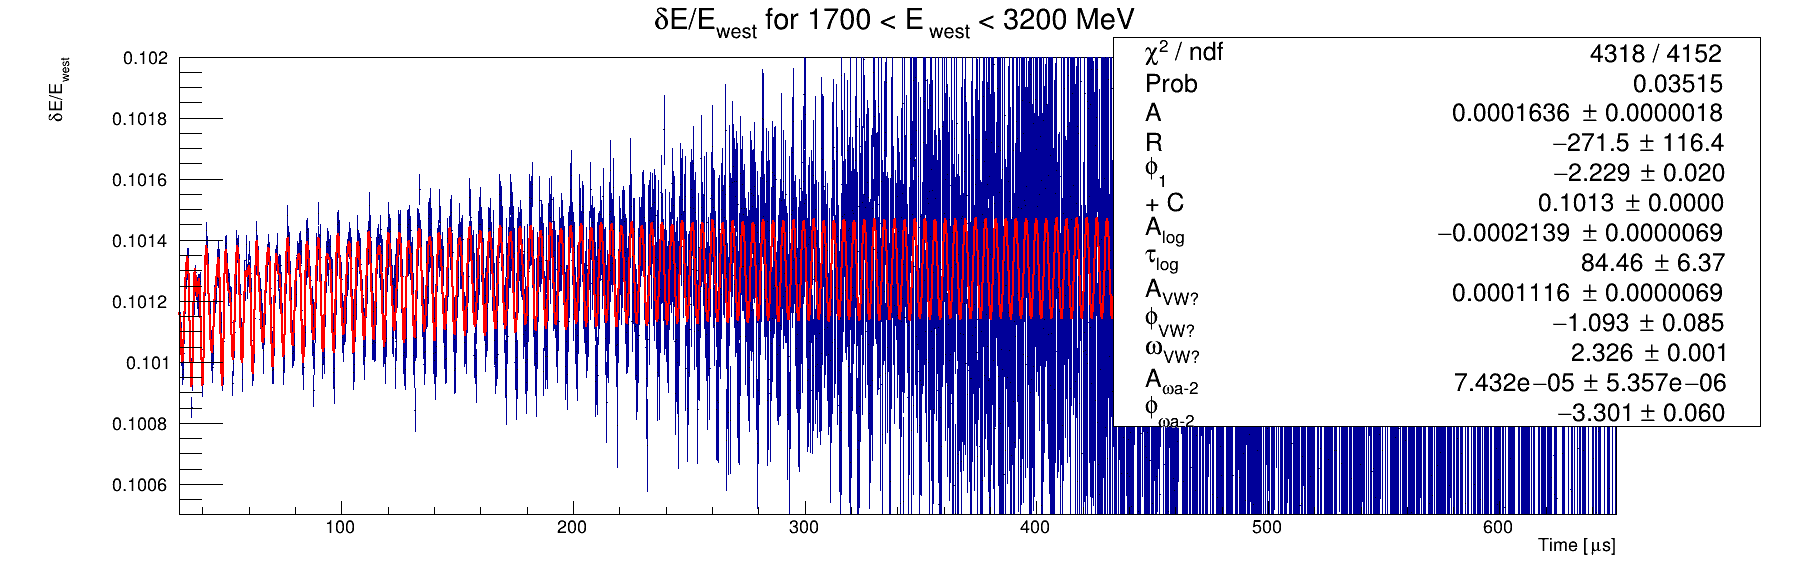

In [71]:
c = r.TCanvas("c","c",1800,600)
hAll2.Draw()
hAll2.GetXaxis().SetRangeUser(30,700)
for i in range(1):
    print("Starting Fit", i+1)
    hAll2.Fit("simplesine_ranges","REMB")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


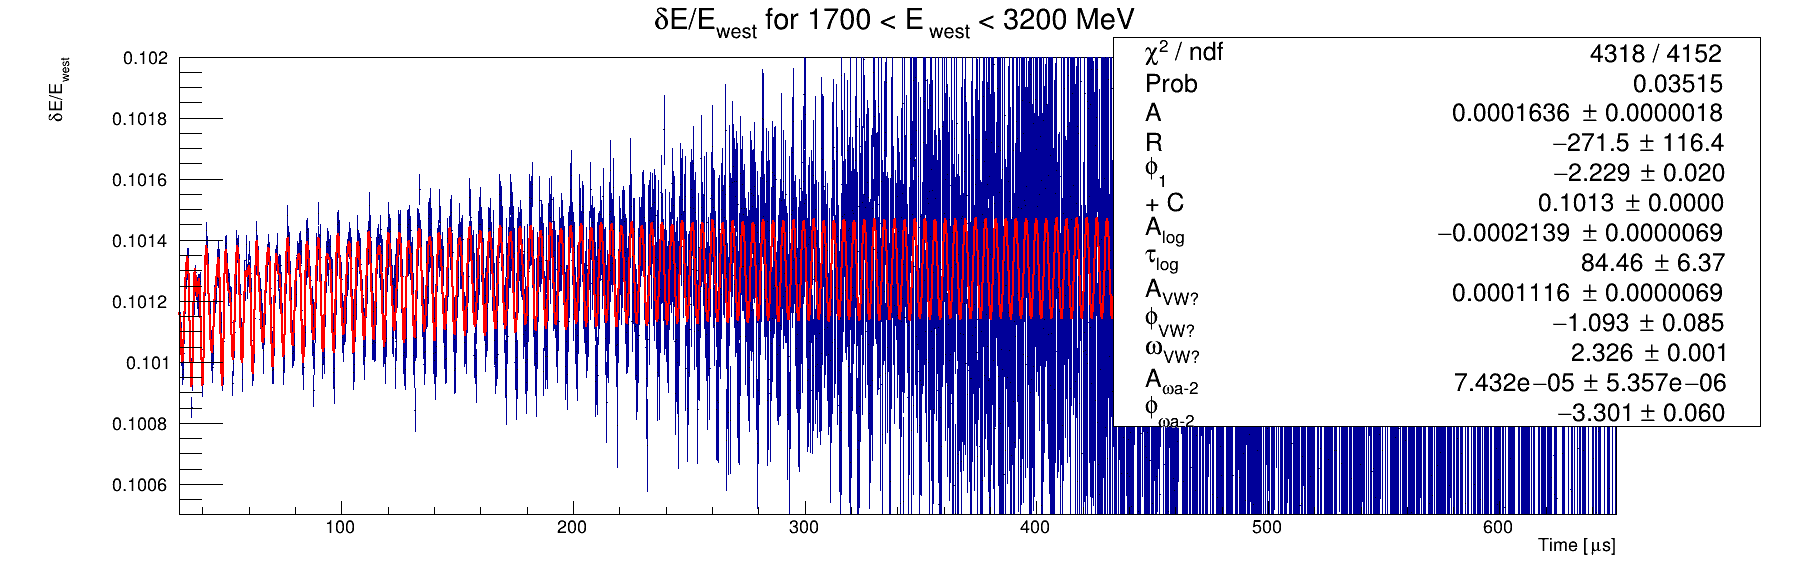

In [72]:
c = r.TCanvas("c","c",1800,600)
hAll2.Draw()
hAll2.GetXaxis().SetRangeUser(30,700)
hAll2.GetYaxis().SetRangeUser(0.1005,.102)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


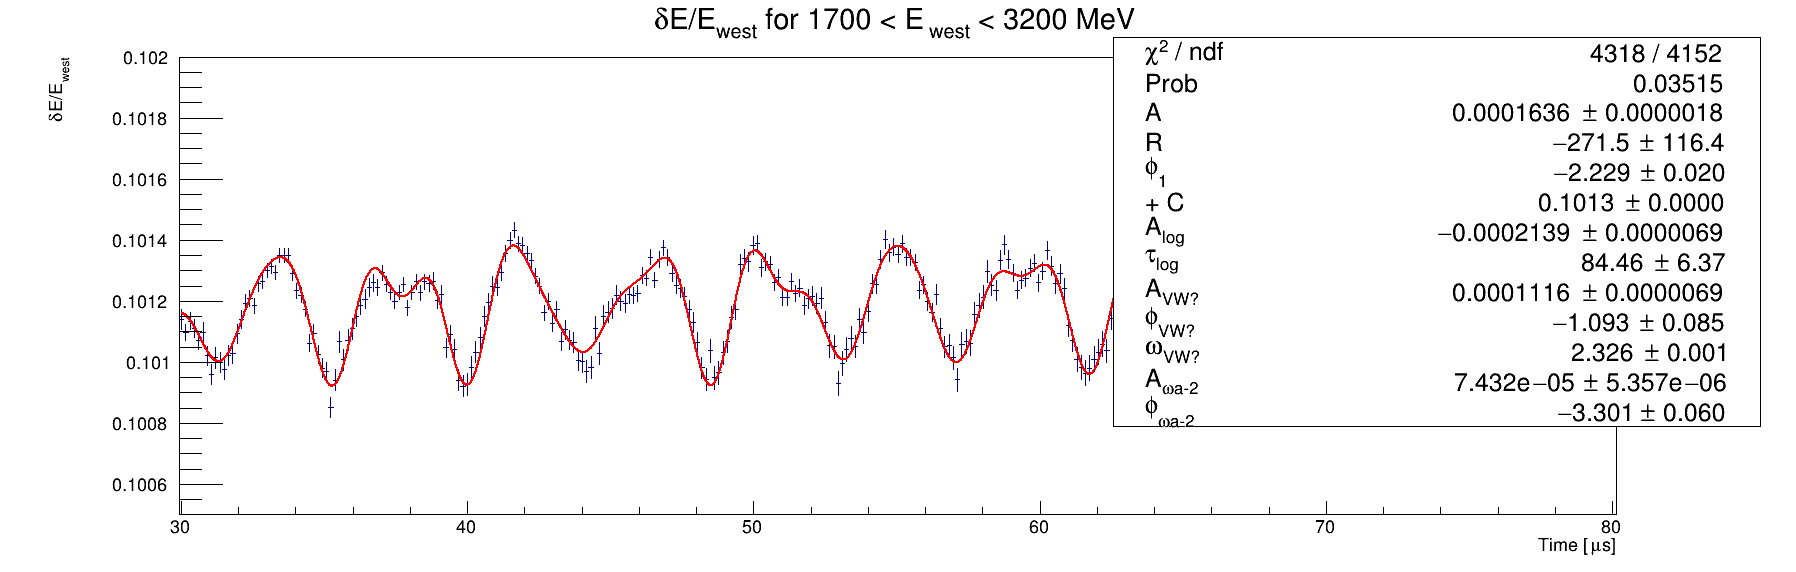

In [73]:
c = r.TCanvas("c","c",1800,600)
hAll2.Draw()
hAll2.GetXaxis().SetRangeUser(30,80)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


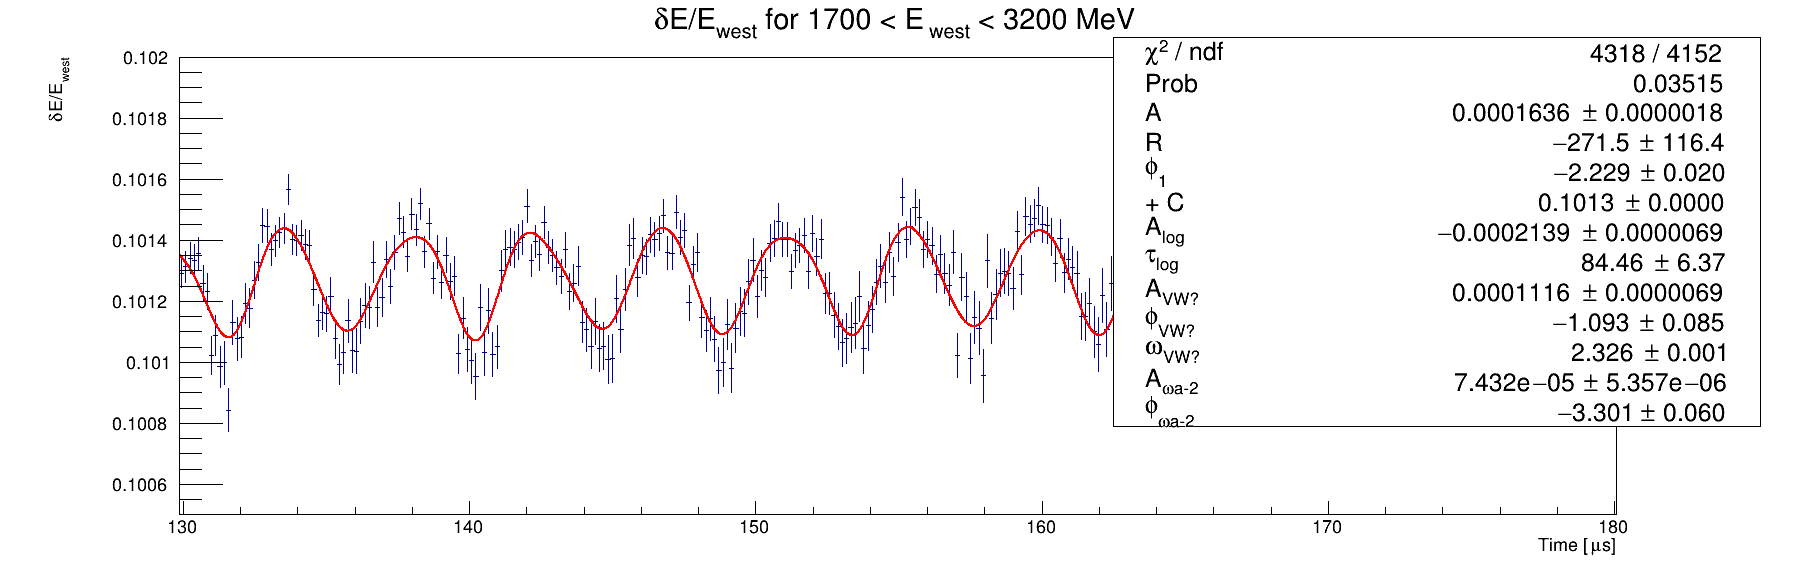

In [74]:
c = r.TCanvas("c","c",1800,600)
hAll2.Draw()
hAll2.GetXaxis().SetRangeUser(130,180)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


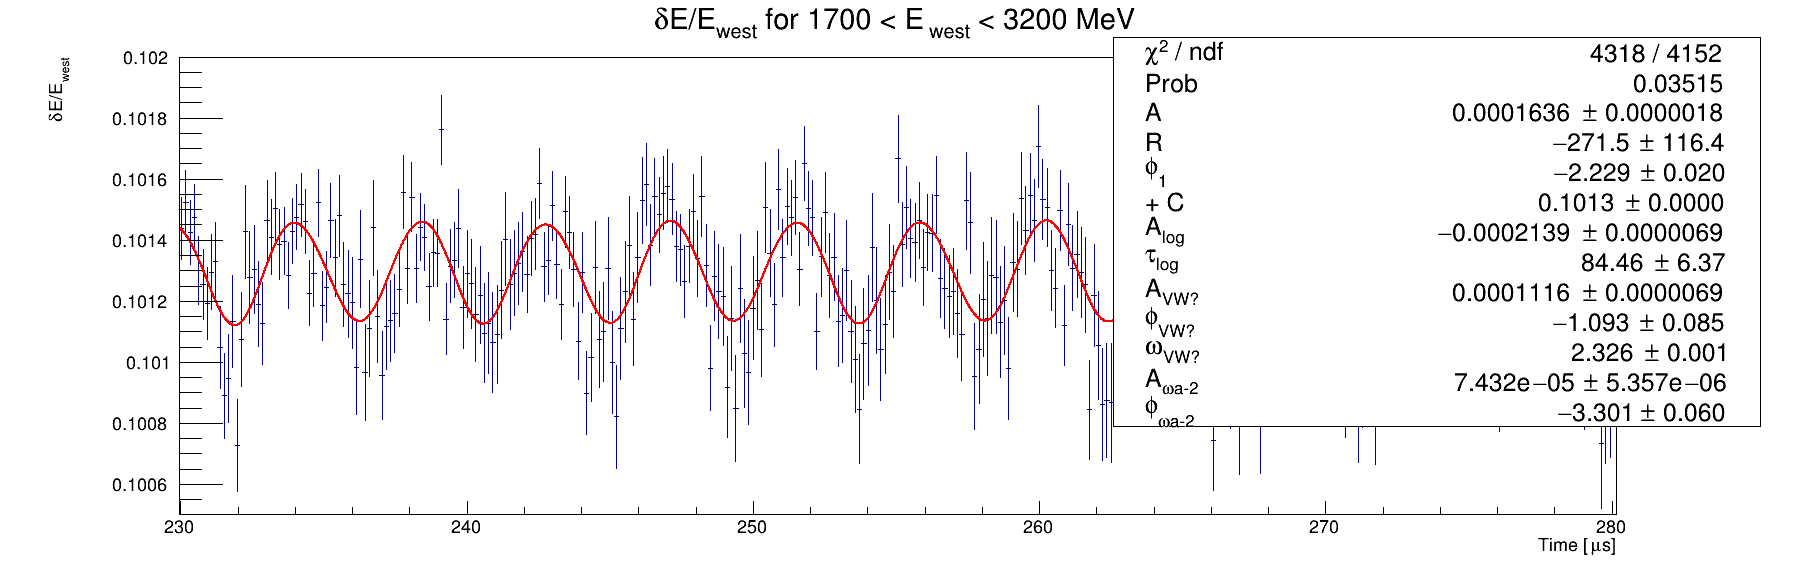

In [75]:
c = r.TCanvas("c","c",1800,600)
hAll2.Draw()
hAll2.GetXaxis().SetRangeUser(230,280)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


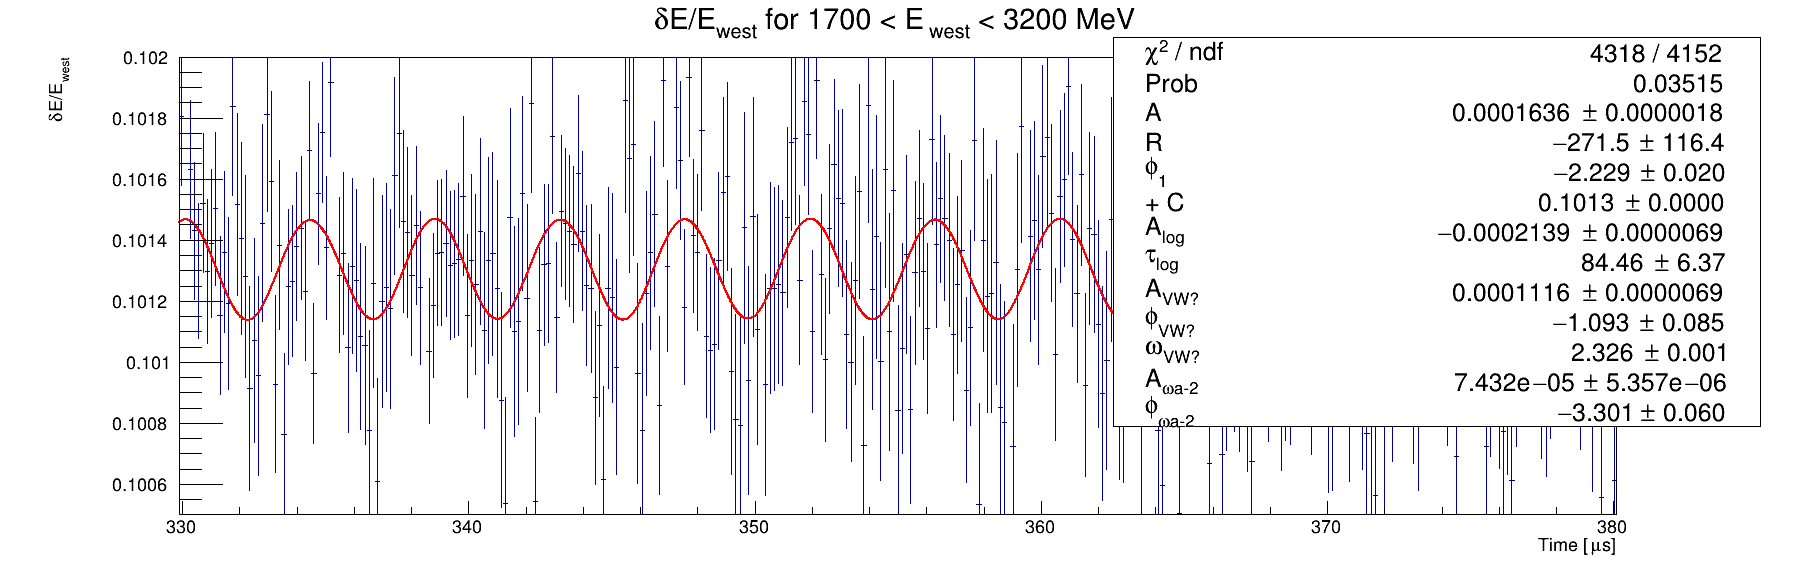

In [76]:
c = r.TCanvas("c","c",1800,600)
hAll2.Draw()
hAll2.GetXaxis().SetRangeUser(330,380)

c.Draw()

In [77]:
print("hi")

hi


---

### Lets draw the fit frequency on the FFT

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


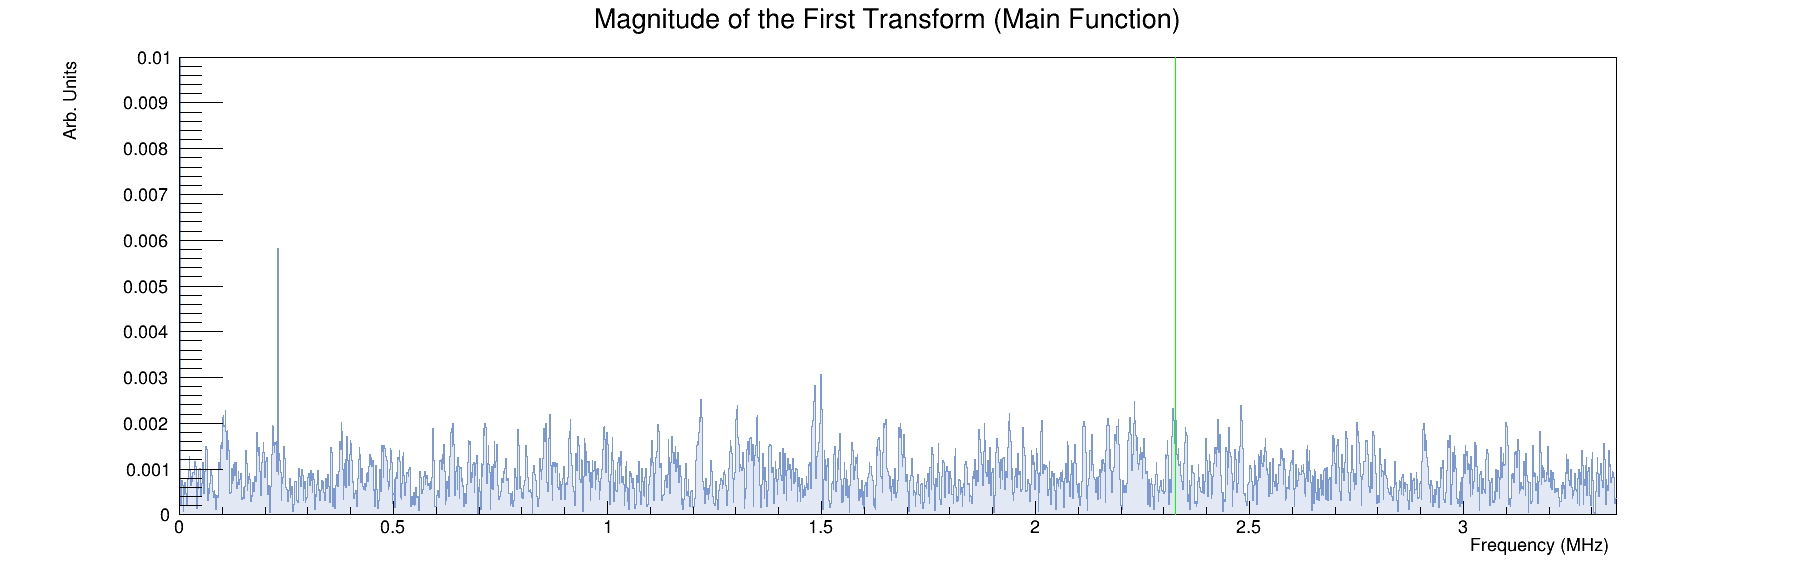

In [78]:
c = r.TCanvas("c","c",1800,600)

ymin = 0.0000001
ymax = 0.01
hAll2_FFT.GetYaxis().SetRangeUser(ymin,ymax)

hAll2_FFT.SetFillColorAlpha(38,0.2)
hAll2_FFT.Draw("HIST")

fitline = r.TLine(func3.GetParameter(8),ymin,func3.GetParameter(8),ymax)
fitline.SetLineColor(3)
fitline.Draw("SAME")

c.Draw()


--- 

### And now FFT the residuals

Warning in <TFile::Append>: Replacing existing TH1: residuals5paramAllXform (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: residuals5paramAllXform (Potential memory leak).


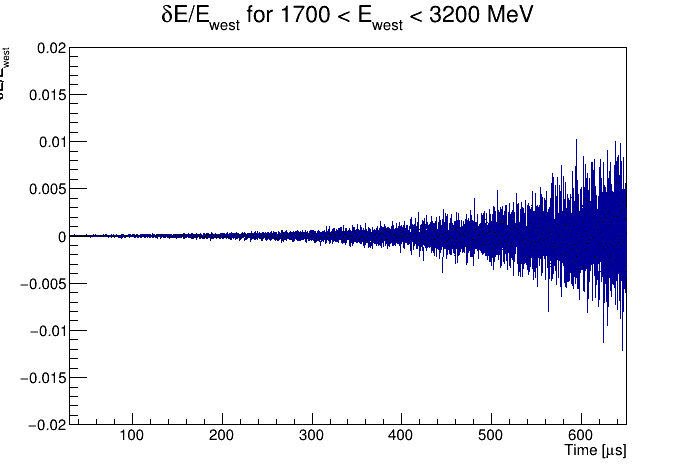

In [79]:
residuals5paramAll = hAll2.ProjectionX("residuals5paramAllXform","e").Clone()
c = r.TCanvas()
residuals5paramAll.Add(func3,-1,"")
residuals5paramAll.GetYaxis().SetRangeUser(-0.02,0.02)
residuals5paramAll.Draw()
c.Draw()


****************************************
Minimizer is Linear
Chi2                      =      933.241
NDf                       =          804
p0                        = -2.71531e-05   +/-   8.51427e-06 
p1                        =  7.41532e-07   +/-   2.29136e-07 
p2                        = -4.09428e-09   +/-   1.35895e-09 


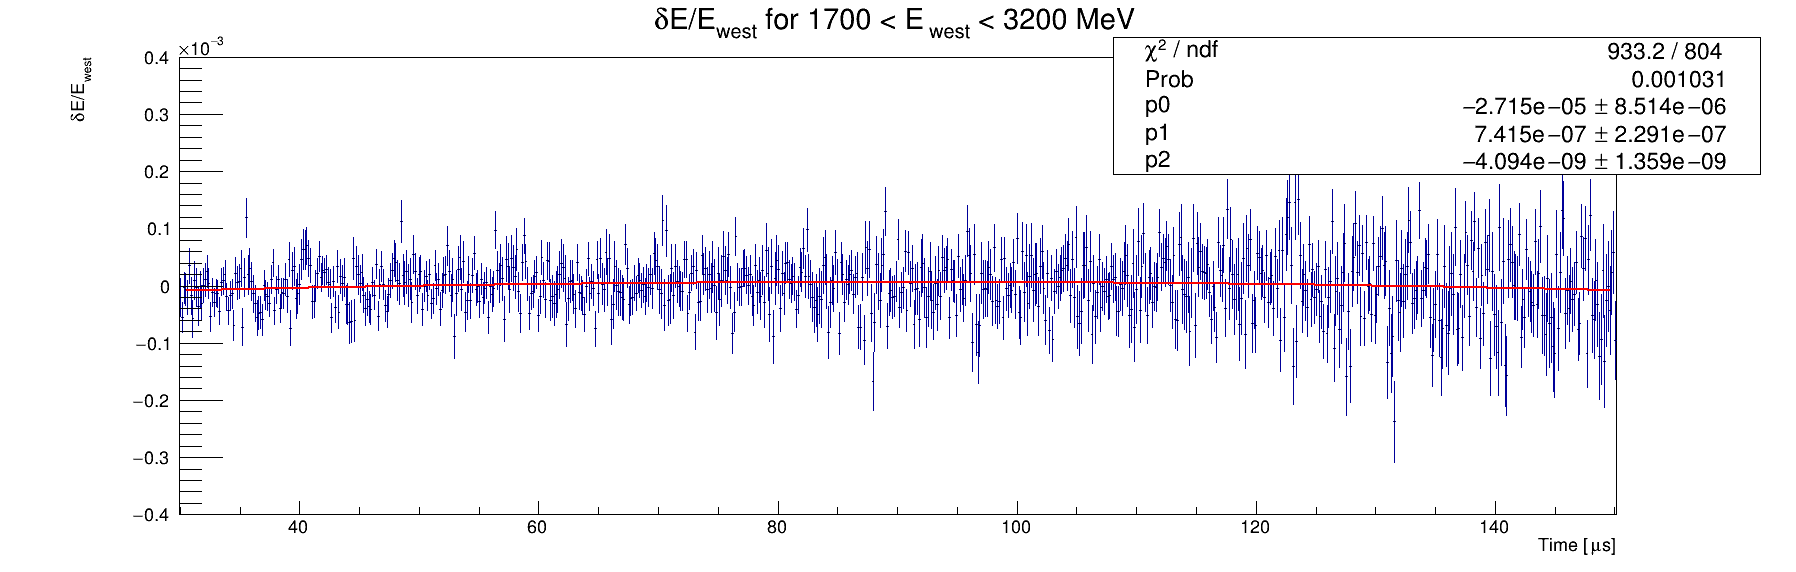

In [80]:
c2 = r.TCanvas("c","c",1800,600)
c2.cd()

residuals5paramAll.Draw("")
residuals5paramAll.GetYaxis().SetRangeUser(-0.0004,0.0004)
residuals5paramAll.GetXaxis().SetRangeUser(30,150)

residuals5paramAll.Fit("pol2")

#hxform.GetYaxis().SetRangeUser(0,1.4)
#c2.SetLogy()
#c2.SetGrid()
c2.Draw()
#c2.Print("./resid.root")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


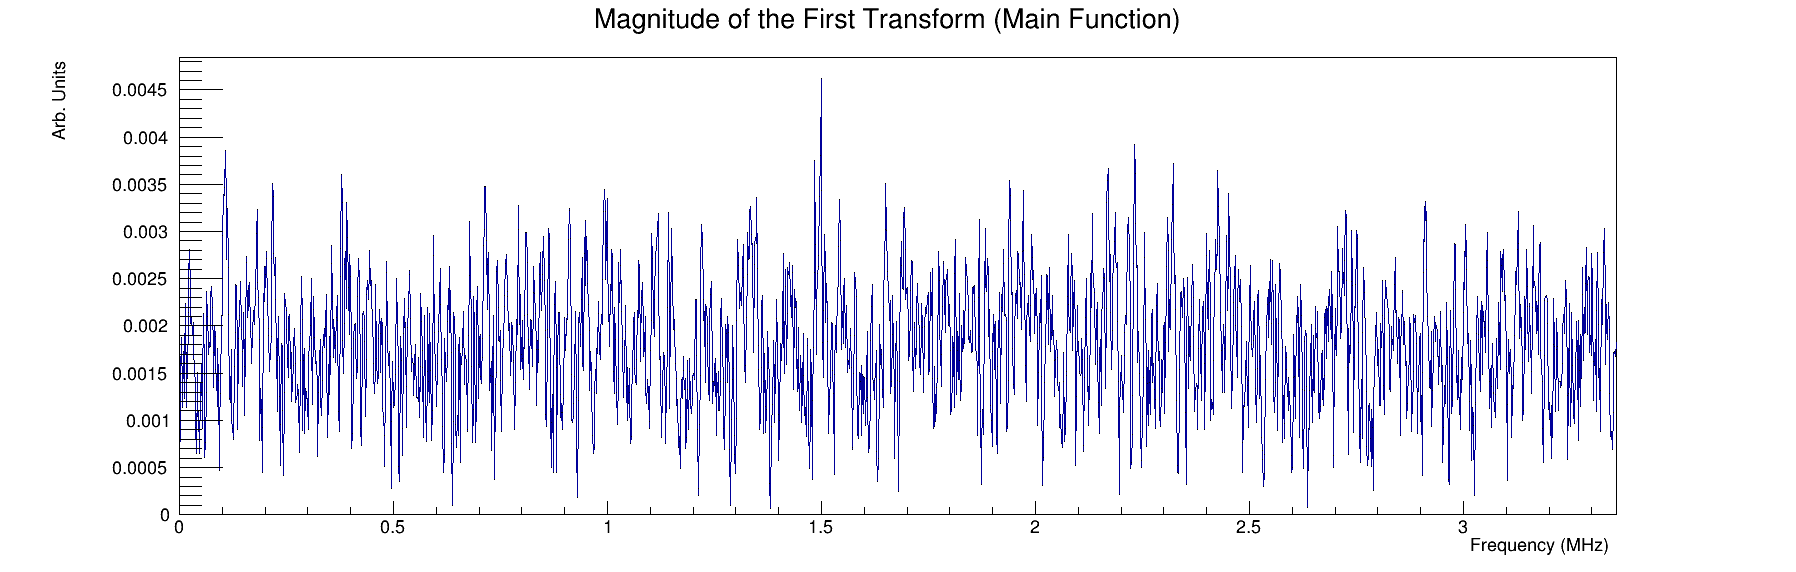

In [81]:
c3 = r.TCanvas("c","c",1800,600)
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5paramAll.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (Main Function)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/r.TMath.Sqrt(normXform))
c2 = r.TCanvas("c","c",1800,600)
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5paramAll.GetSize() -2
minBinCenter = residuals5paramAll.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5paramAll.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = hAll2.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

#c2.SetLogy()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


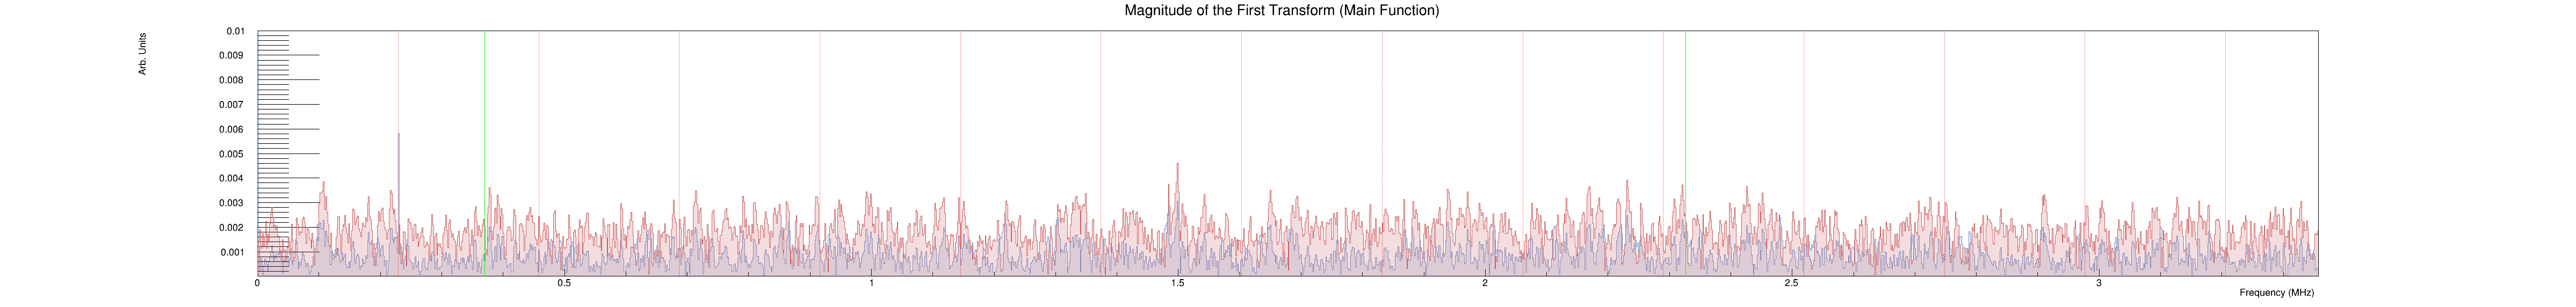

In [82]:
c = r.TCanvas("c","c",4800,600)

ymin = 0.000001
ymax = 0.01
hAll2_FFT.GetYaxis().SetRangeUser(ymin,ymax)

hAll2_FFT.SetFillColorAlpha(38,0.2)
hAll2_FFT.SetLineColor(38)
hAll2_FFT.Draw("HIST")

hxform.SetFillColorAlpha(46,0.2)
hxform.SetLineColor(46)
hxform.Draw("HIST SAME")

fitline = r.TLine(func3.GetParameter(8),ymin,func3.GetParameter(8),ymax)
fitline.SetLineColor(3)
fitline.Draw("SAME")

cboline = r.TLine(0.37,ymin,0.37,ymax)
cboline.SetLineColor(3)
cboline.Draw("SAME")

cboline2 = r.TLine(func3.GetParameter(12),ymin,func3.GetParameter(12),ymax)
cboline2.SetLineColor(6)
cboline2.Draw("SAME")

oalines = []
for i in range(1,15):
    oalinei = r.TLine(0.229*i,ymin,0.229*i,ymax)
    oalinei.SetLineColor(2)
    oalinei.SetLineStyle(3)
    oalinei.Draw()
    oalines.append(oalinei)


#c.SetLogy()
c.Draw()


In [83]:
func3.GetParameter(12)

0.0